In [3]:
import numpy as np
import pyemma
import matplotlib
import matplotlib.pyplot as plt
from collections import Counter
import mdtraj as md
import glob

/anaconda3/lib/python3.6/site-packages/pyemma/__init__.py:130: UserWarning: You are not using the latest release of PyEMMA. Latest is 2.5.5, you have 2.5.2.
  .format(latest=latest, current=current), category=UserWarning)


In [2]:
dtrajs = np.load('randforest_distall_dtrajs.npy')

In [3]:
dtrajs = [np.concatenate(x) for x in dtrajs]

In [4]:
len(dtrajs)

3999

In [5]:
# wt + mut

In [6]:
dtrajs_ = list(np.concatenate([dtrajs[:1000], dtrajs[1999:2999]]))

In [7]:
len(dtrajs_)

2000

In [18]:
its = pyemma.msm.its(dtrajs_, n_jobs=8)

HBox(children=(HBox(children=(Label(value='estimating MaximumLikelihoodMSM'),), layout=Layout(max_width='35%', min_width='35%')), HBox(children=(IntProgress(value=0, max=16), HTML(value='')), layout=Layout(padding='0 0 0 20px'))), layout=Layout(display='flex', width='100%'))

24-03-19 17:26:57 pyemma.msm.estimators.implied_timescales.ImpliedTimescales[1] WARNING  Some timescales could not be computed. Timescales array is smaller than expected or contains NaNs


/anaconda3/lib/python3.6/site-packages/matplotlib/scale.py:111: RuntimeWarning: invalid value encountered in less_equal
  out[a <= 0] = -1000


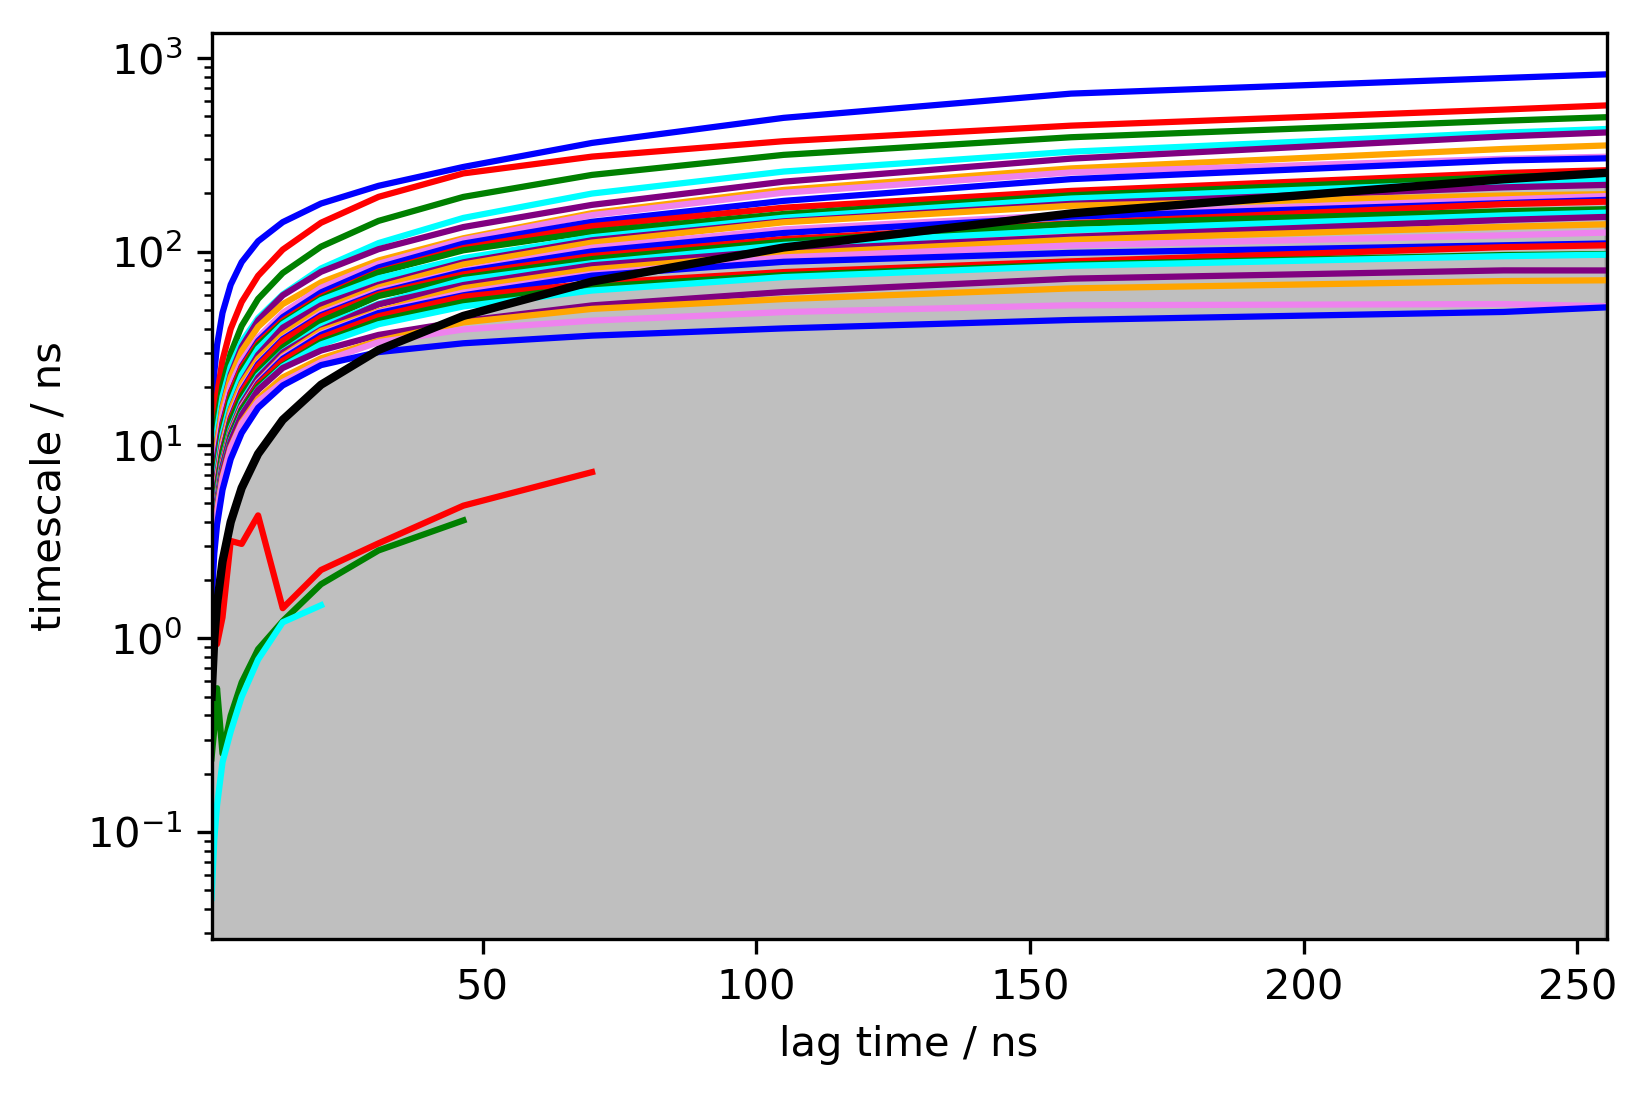

In [20]:
plt.figure(dpi=300)
pyemma.plots.plot_implied_timescales(its, units='ns', dt=0.5)

In [11]:
msm = pyemma.msm.estimate_markov_model(dtrajs_, lag=200)

In [168]:
msm.timescales()[0]/2

472.31727208923473

In [169]:
msm.nstates

30

In [170]:
msm.active_count_fraction

0.9999921665086913

In [27]:
emp_pi = np.array([Counter(np.concatenate(dtrajs_))[x] for x in range(100)])
emp_pi = emp_pi / np.sum(emp_pi)

Text(0,0.5,'MSM population')

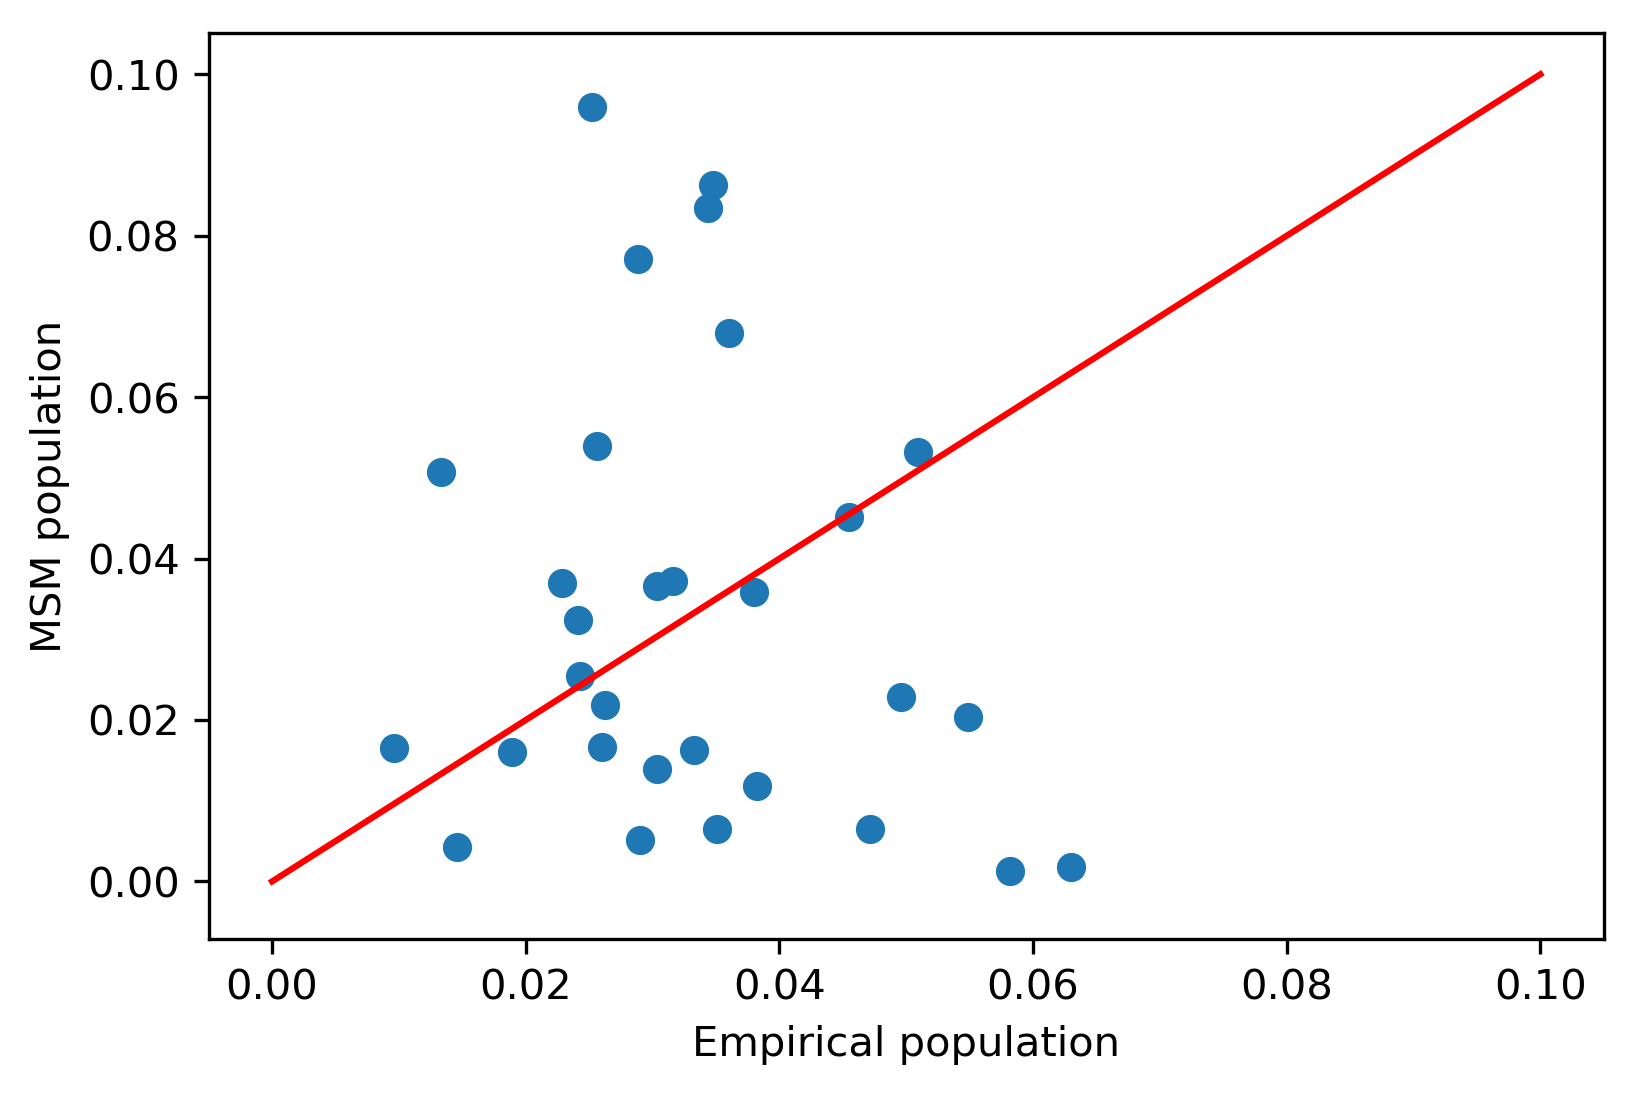

In [29]:
plt.figure(dpi=300)
plt.scatter(emp_pi[msm.active_set],msm.pi)
plt.plot([0,0.1], [0,0.1], color='red')
plt.xlabel('Empirical population')
plt.ylabel('MSM population')

In [30]:
# plot eigenvalues to choose separation for pcca

Text(0,0.5,'Eigenvalue')

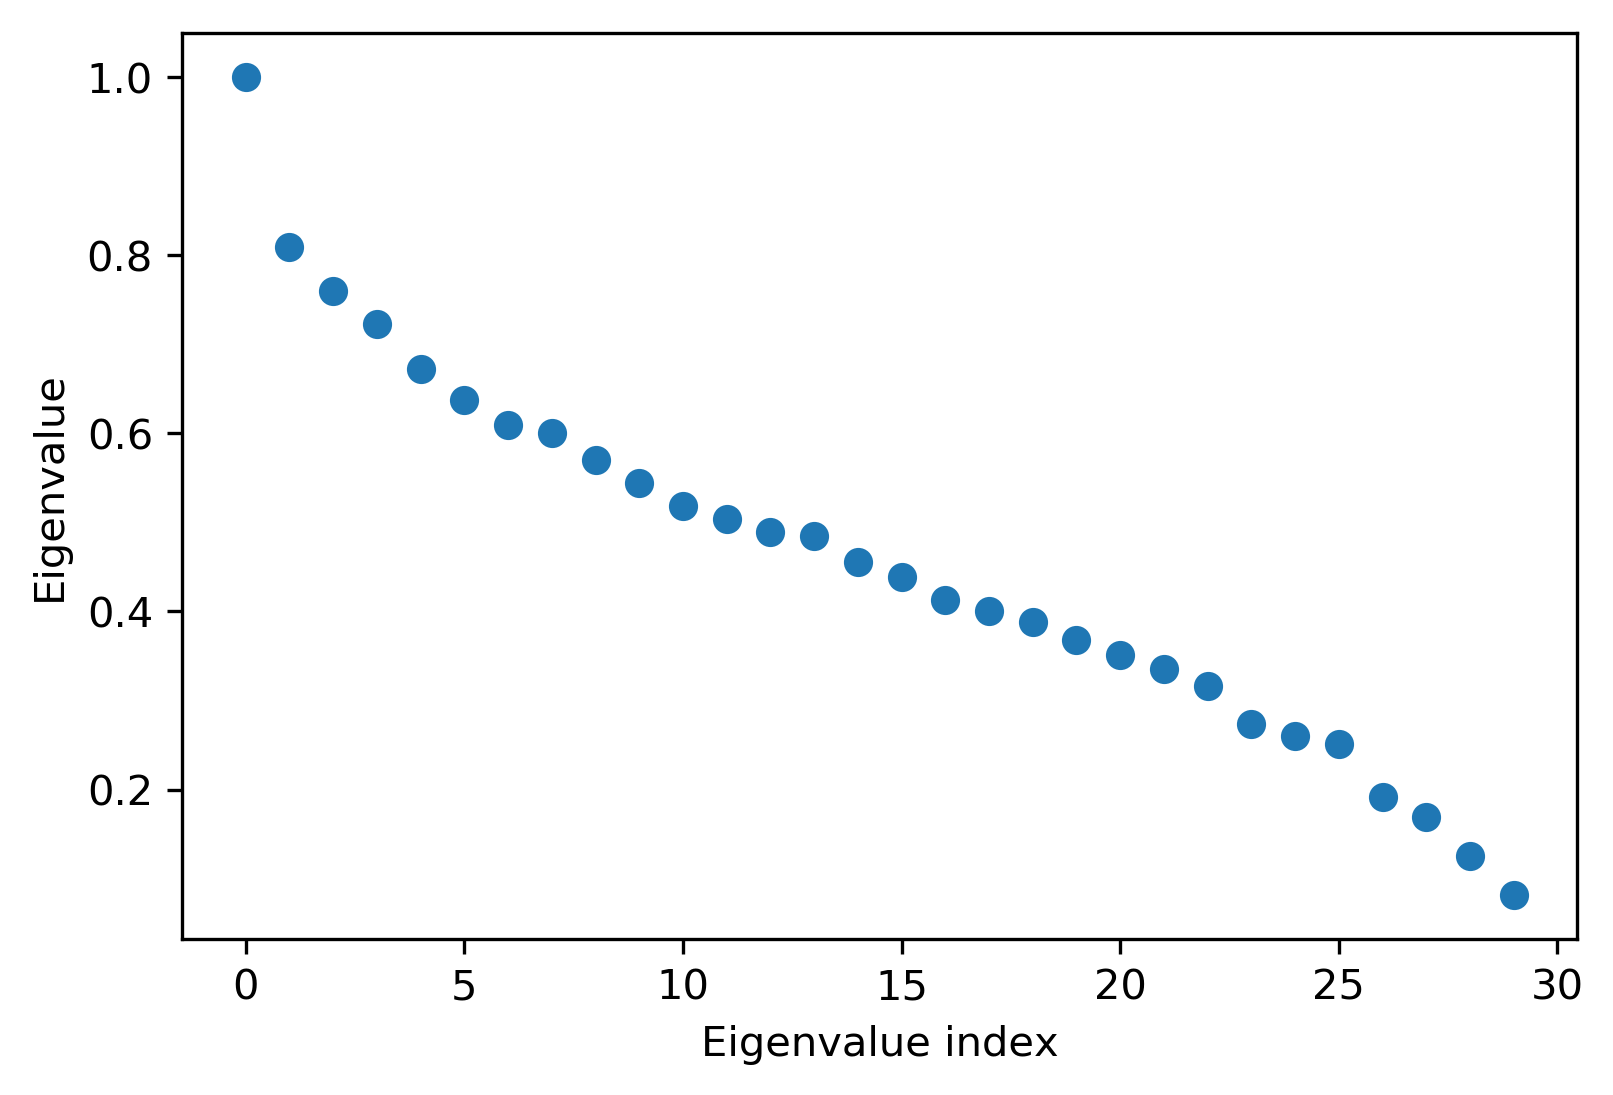

In [47]:
plt.figure(dpi=300)
plt.scatter(range(len(msm.eigenvalues())), msm.eigenvalues())
plt.xlabel('Eigenvalue index')
plt.ylabel('Eigenvalue')

In [152]:
# no timescale separation - let's do minimum amount of states to get difference in populations between two systems

In [12]:
pcca = msm.pcca(3)

In [13]:
msm_wt = pyemma.msm.estimate_markov_model(dtrajs[:1000], lag=200)

In [14]:
msm_mut = pyemma.msm.estimate_markov_model(dtrajs[1999:2999], lag=200)

In [15]:
msm.active_set == msm_wt.active_set

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

In [16]:
msm.active_set == msm_mut.active_set

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

In [17]:
# populations - need to use fuzzy memberships!!

In [18]:
wt_pi = [0]*len(pcca.metastable_sets)

for i in range(len(msm_wt.active_set)):
    for j, membership in enumerate(pcca.memberships[i]):
        wt_pi[j] += msm_wt.pi[i]*membership

In [19]:
mut_pi = [0]*len(pcca.metastable_sets)

for i in range(len(msm_mut.active_set)):
    for j, membership in enumerate(pcca.memberships[i]):
        mut_pi[j] += msm_mut.pi[i]*membership

In [20]:
wt_pi

[0.14305273577705355, 0.5324894995056053, 0.3244577647173413]

In [21]:
mut_pi

[0.24792429208791447, 0.26871075643913483, 0.48336495147295055]

In [22]:
# plot populations as donut plot

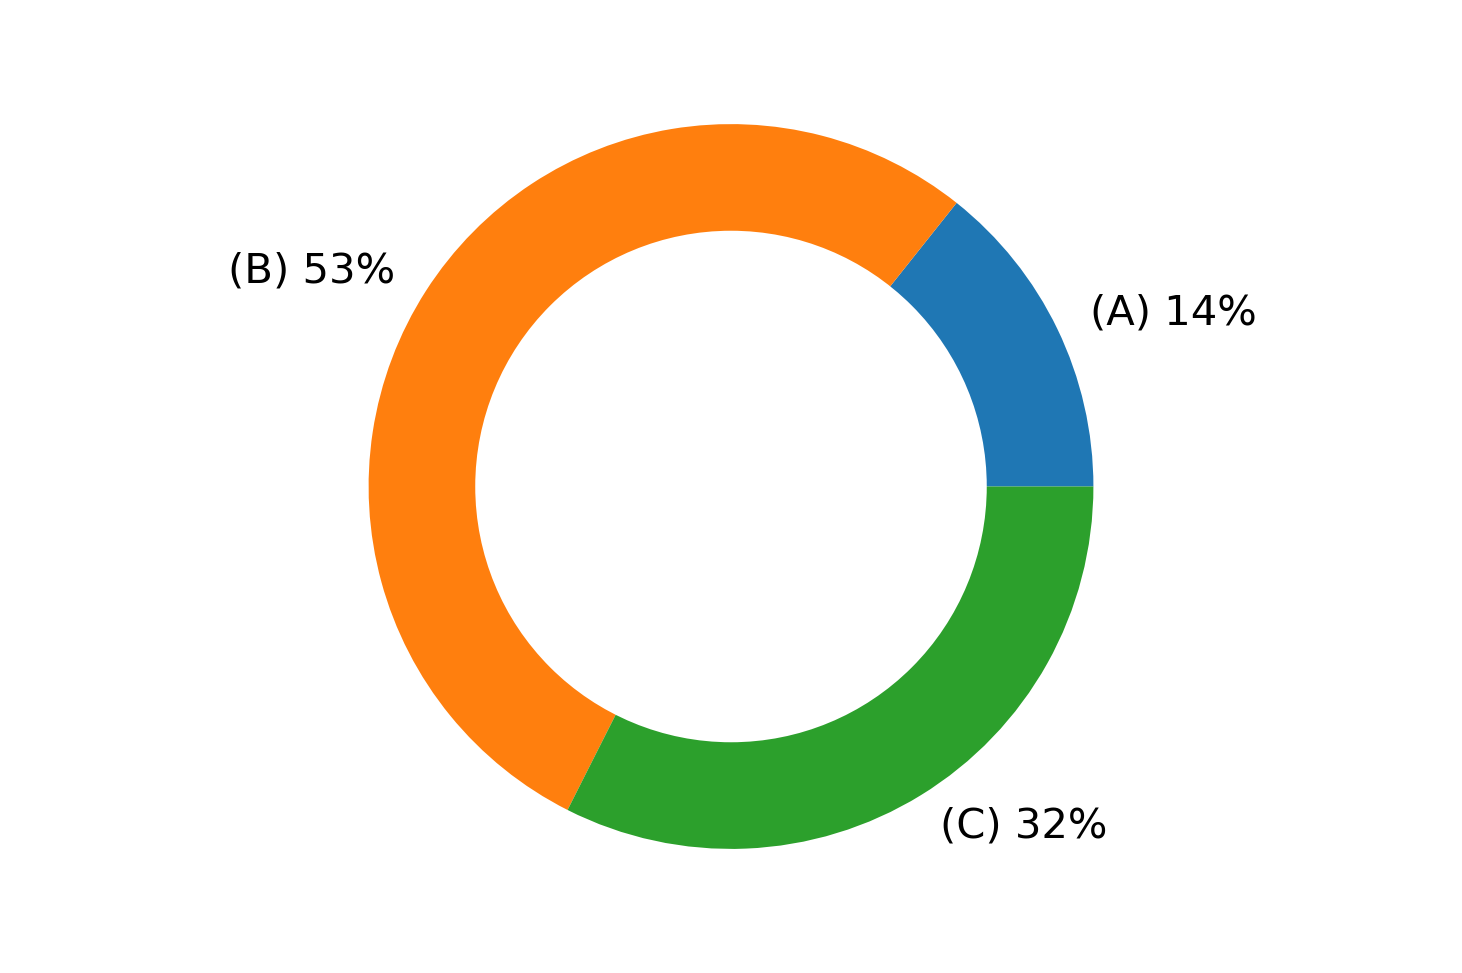

In [41]:
plt.figure(dpi=300)
plt.axis("equal")
# create data
size_of_groups = wt_pi

# Create a pieplot
#plt.pie(size_of_groups, labels=[str(x*100)[:2]+'%' for x in size_of_groups])
plt.pie(size_of_groups, labels=['(A) 14%', '(B) 53%', '(C) 32%'])
 
# add a circle at the center
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
 
plt.show()

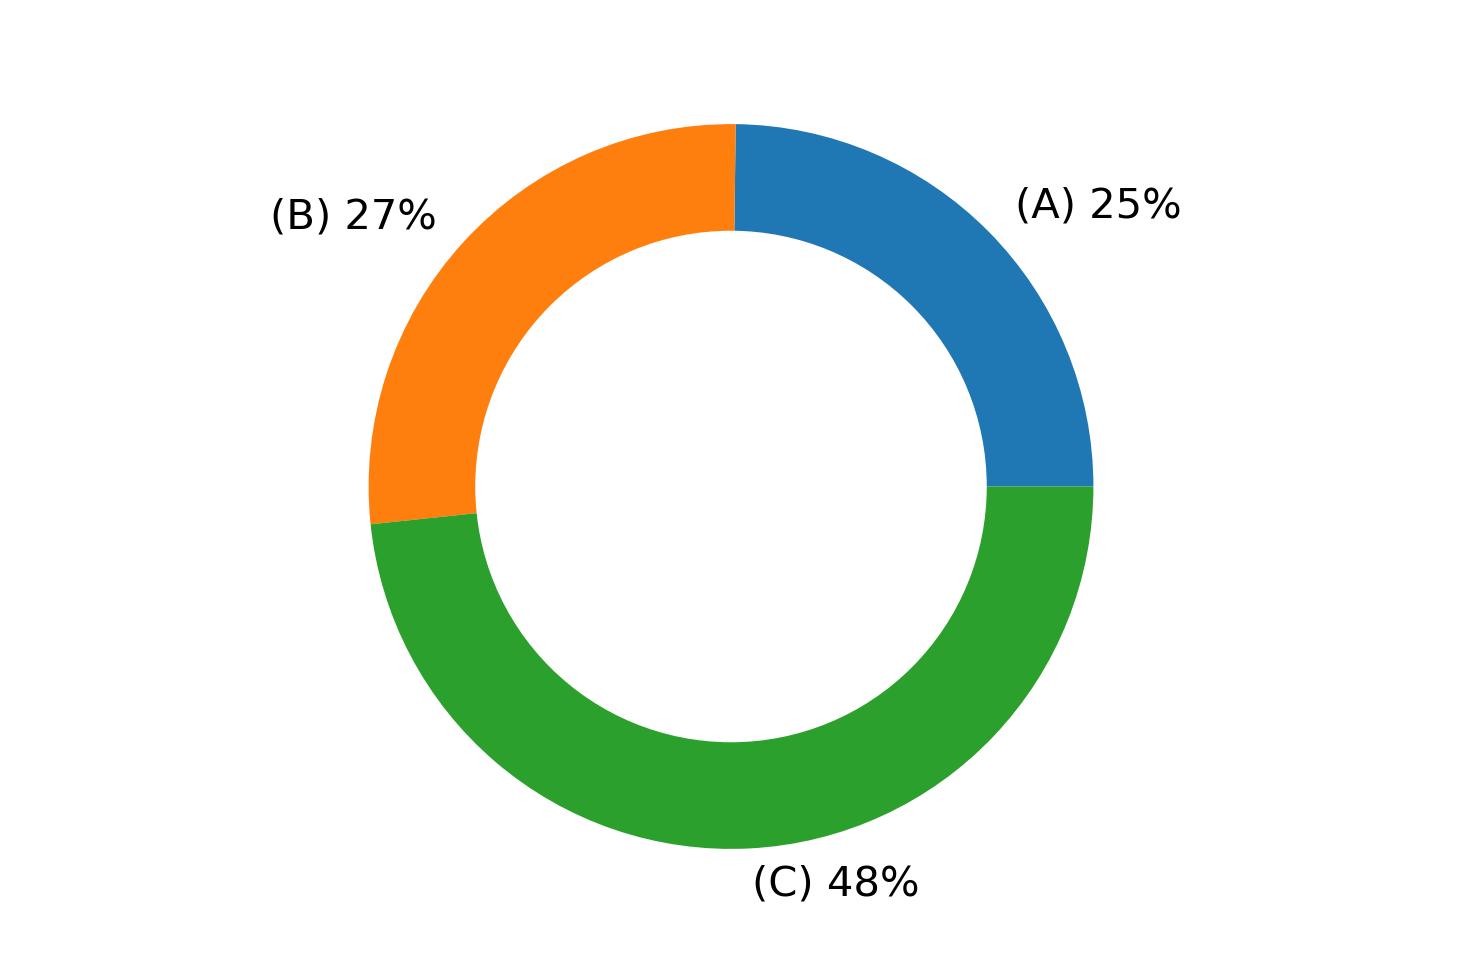

In [43]:
plt.figure(dpi=300)
plt.axis("equal")
# create data
size_of_groups = mut_pi

# Create a pieplot
#plt.pie(size_of_groups, labels=[str(x*100)[:2]+'%' for x in size_of_groups])
plt.pie(size_of_groups, labels=['(A) 25%', '(B) 27%', '(C) 48%'])
 
# add a circle at the center
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
 
plt.show()

In [588]:
diff = []

for i in range(len(wt_pi)):
    diff.append(np.abs(wt_pi[i]-mut_pi[i]))
    
np.sum(diff)/2

0.2637787430664703

In [218]:
# cktest

In [589]:
cktest = msm_wt.cktest(3, n_jobs=8, memberships=pcca.memberships)

HBox(children=(HBox(children=(Label(value='estimating MaximumLikelihoodMSM'),), layout=Layout(max_width='35%', min_width='35%')), HBox(children=(IntProgress(value=0, max=9), HTML(value='')), layout=Layout(padding='0 0 0 20px'))), layout=Layout(display='flex', width='100%'))

25-03-19 00:41:17 pyemma.msm.estimators.maximum_likelihood_msm.MaximumLikelihoodMSM[11] WARNING  Ignored error during estimation: Active set is empty. Cannot estimate MSM.


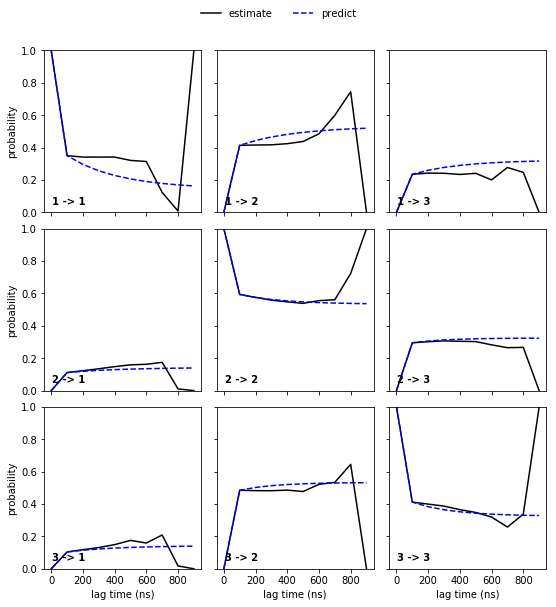

In [590]:
plt.figure(dpi=300)
pyemma.plots.plot_cktest(cktest, dt=0.5, units='ns')
plt.show()

In [591]:
cktest = msm_mut.cktest(3, n_jobs=8, memberships=pcca.memberships)

HBox(children=(HBox(children=(Label(value='estimating MaximumLikelihoodMSM'),), layout=Layout(max_width='35%', min_width='35%')), HBox(children=(IntProgress(value=0, max=9), HTML(value='')), layout=Layout(padding='0 0 0 20px'))), layout=Layout(display='flex', width='100%'))

25-03-19 00:41:37 pyemma.msm.estimators.maximum_likelihood_msm.MaximumLikelihoodMSM[12] WARNING  Ignored error during estimation: Active set is empty. Cannot estimate MSM.


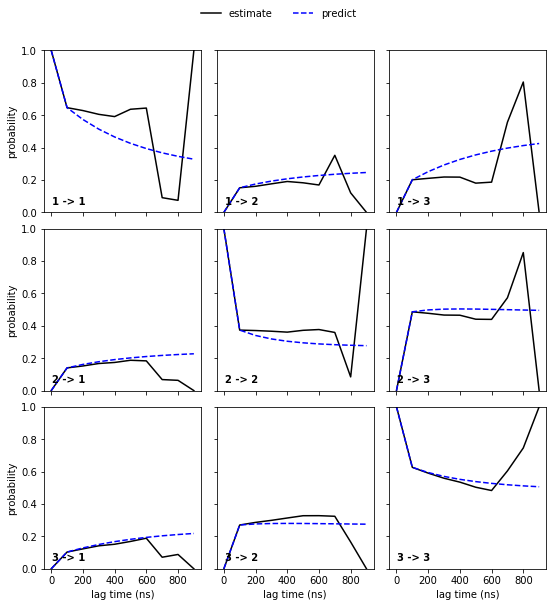

In [592]:
plt.figure(dpi=300)
pyemma.plots.plot_cktest(cktest, dt=0.5, units='ns')
plt.show()

In [62]:
####

In [63]:
# ins + mut_ins

In [44]:
dtrajs_ = list(np.concatenate([dtrajs[1000:1999], dtrajs[2999:3999]]))

In [45]:
len(dtrajs_)

1999

In [66]:
its = pyemma.msm.its(dtrajs_, n_jobs=8)

HBox(children=(HBox(children=(Label(value='estimating MaximumLikelihoodMSM'),), layout=Layout(max_width='35%', min_width='35%')), HBox(children=(IntProgress(value=0, max=16), HTML(value='')), layout=Layout(padding='0 0 0 20px'))), layout=Layout(display='flex', width='100%'))

24-03-19 17:41:18 pyemma.msm.estimators.implied_timescales.ImpliedTimescales[3] WARNING  Some timescales could not be computed. Timescales array is smaller than expected or contains NaNs


/anaconda3/lib/python3.6/site-packages/matplotlib/scale.py:111: RuntimeWarning: invalid value encountered in less_equal
  out[a <= 0] = -1000


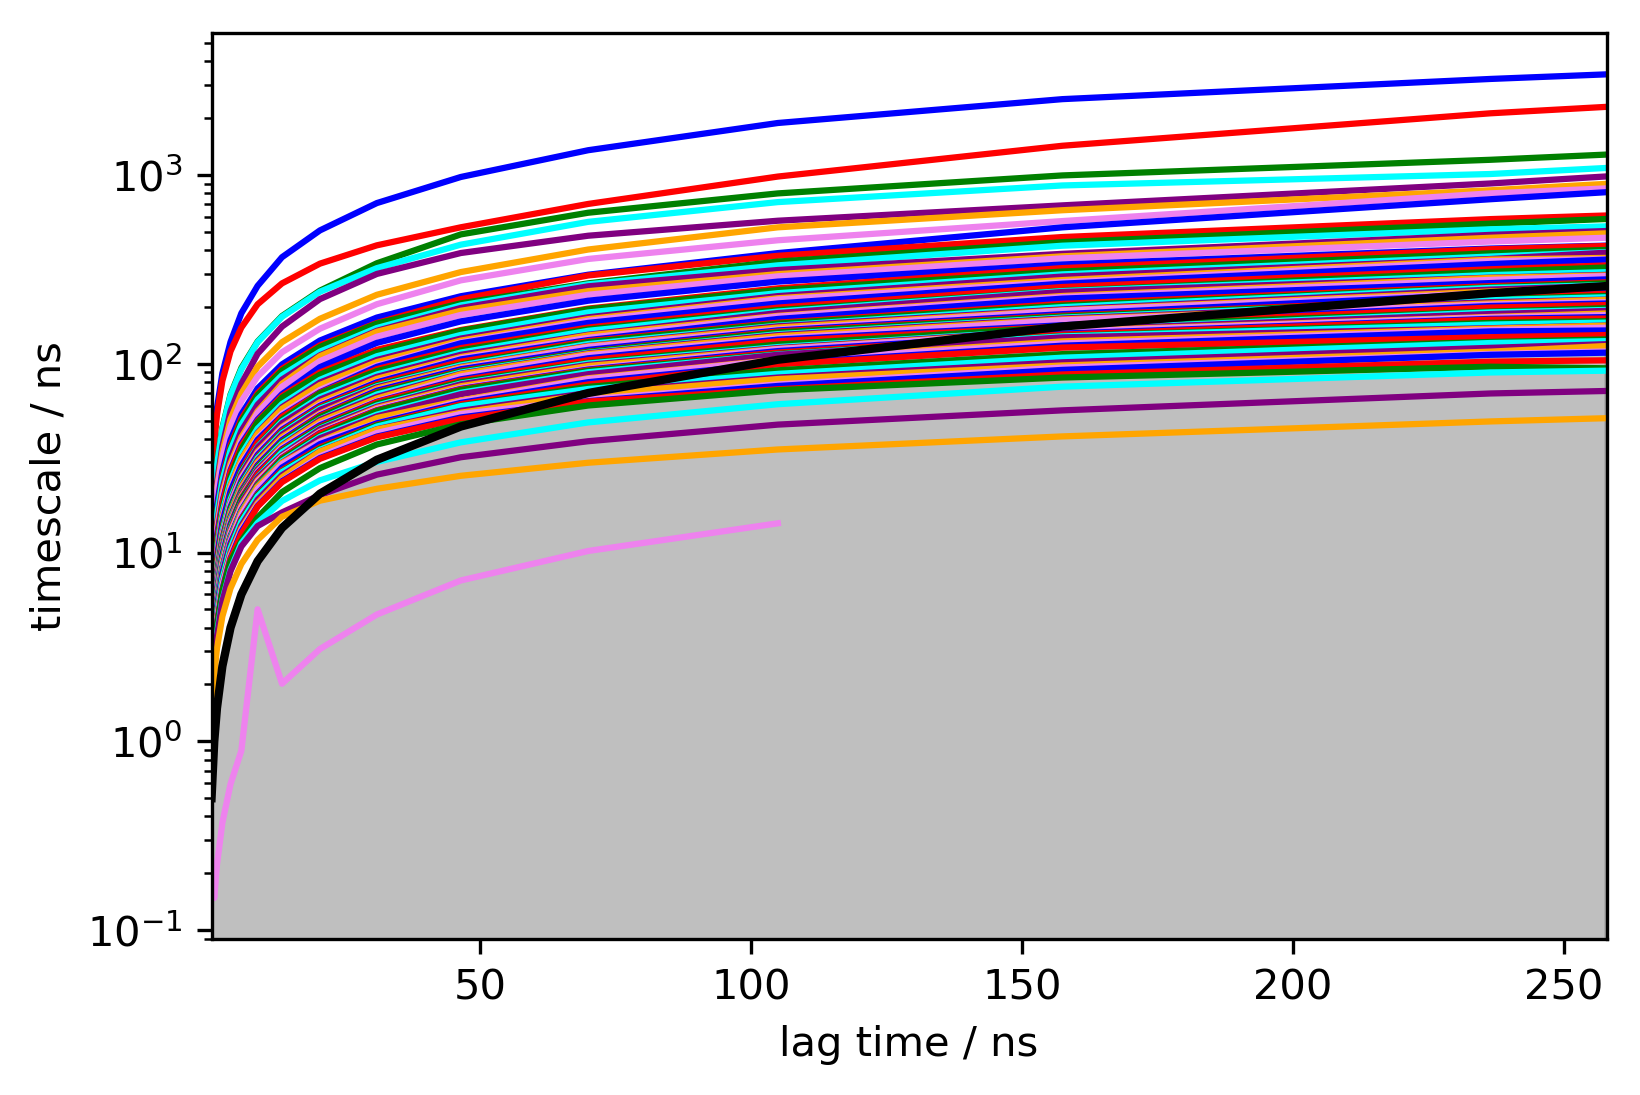

In [67]:
plt.figure(dpi=300)
pyemma.plots.plot_implied_timescales(its, units='ns', dt=0.5)

In [46]:
msm = pyemma.msm.estimate_markov_model(dtrajs_, lag=200)

In [1440]:
msm.timescales()[0]/2

1814.374488869343

In [1441]:
msm.nstates

71

In [1442]:
msm.active_count_fraction

1.0

In [72]:
emp_pi = np.array([Counter(np.concatenate(dtrajs_))[x] for x in range(100)])
emp_pi = emp_pi / np.sum(emp_pi)

Text(0,0.5,'MSM population')

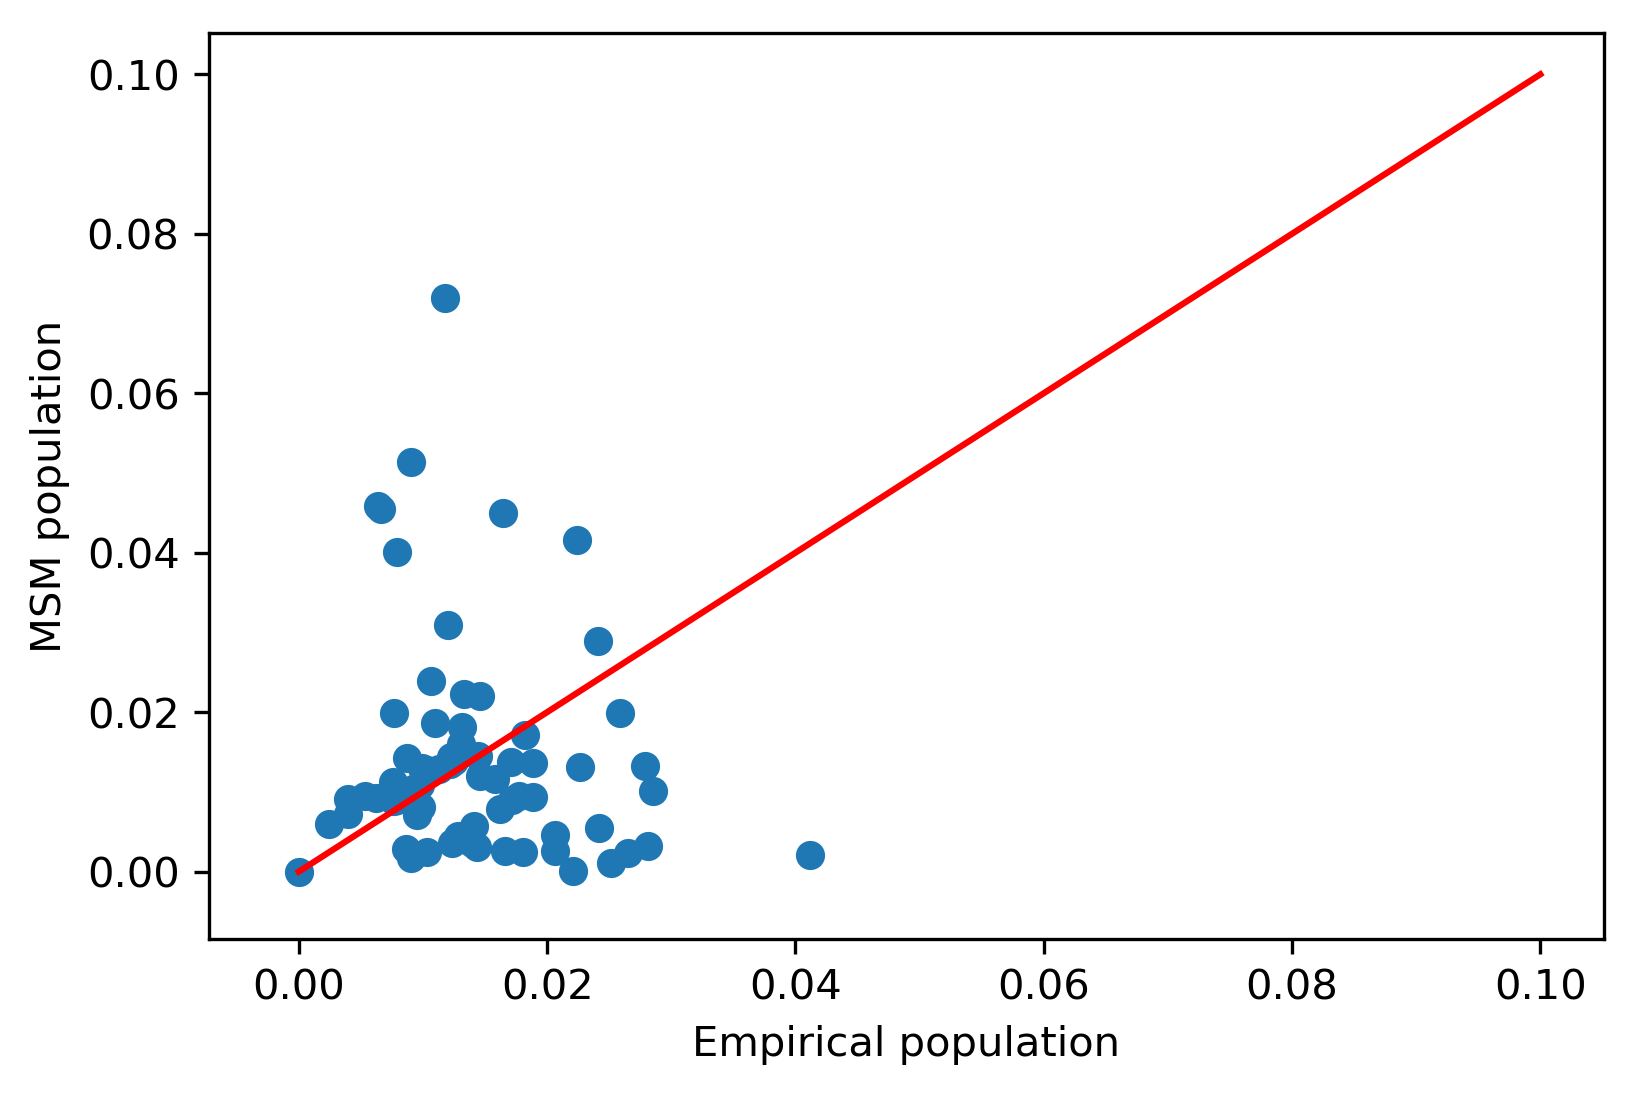

In [73]:
plt.figure(dpi=300)
plt.scatter(emp_pi[msm.active_set],msm.pi)
plt.plot([0,0.1], [0,0.1], color='red')
plt.xlabel('Empirical population')
plt.ylabel('MSM population')

Text(0,0.5,'Eigenvalue')

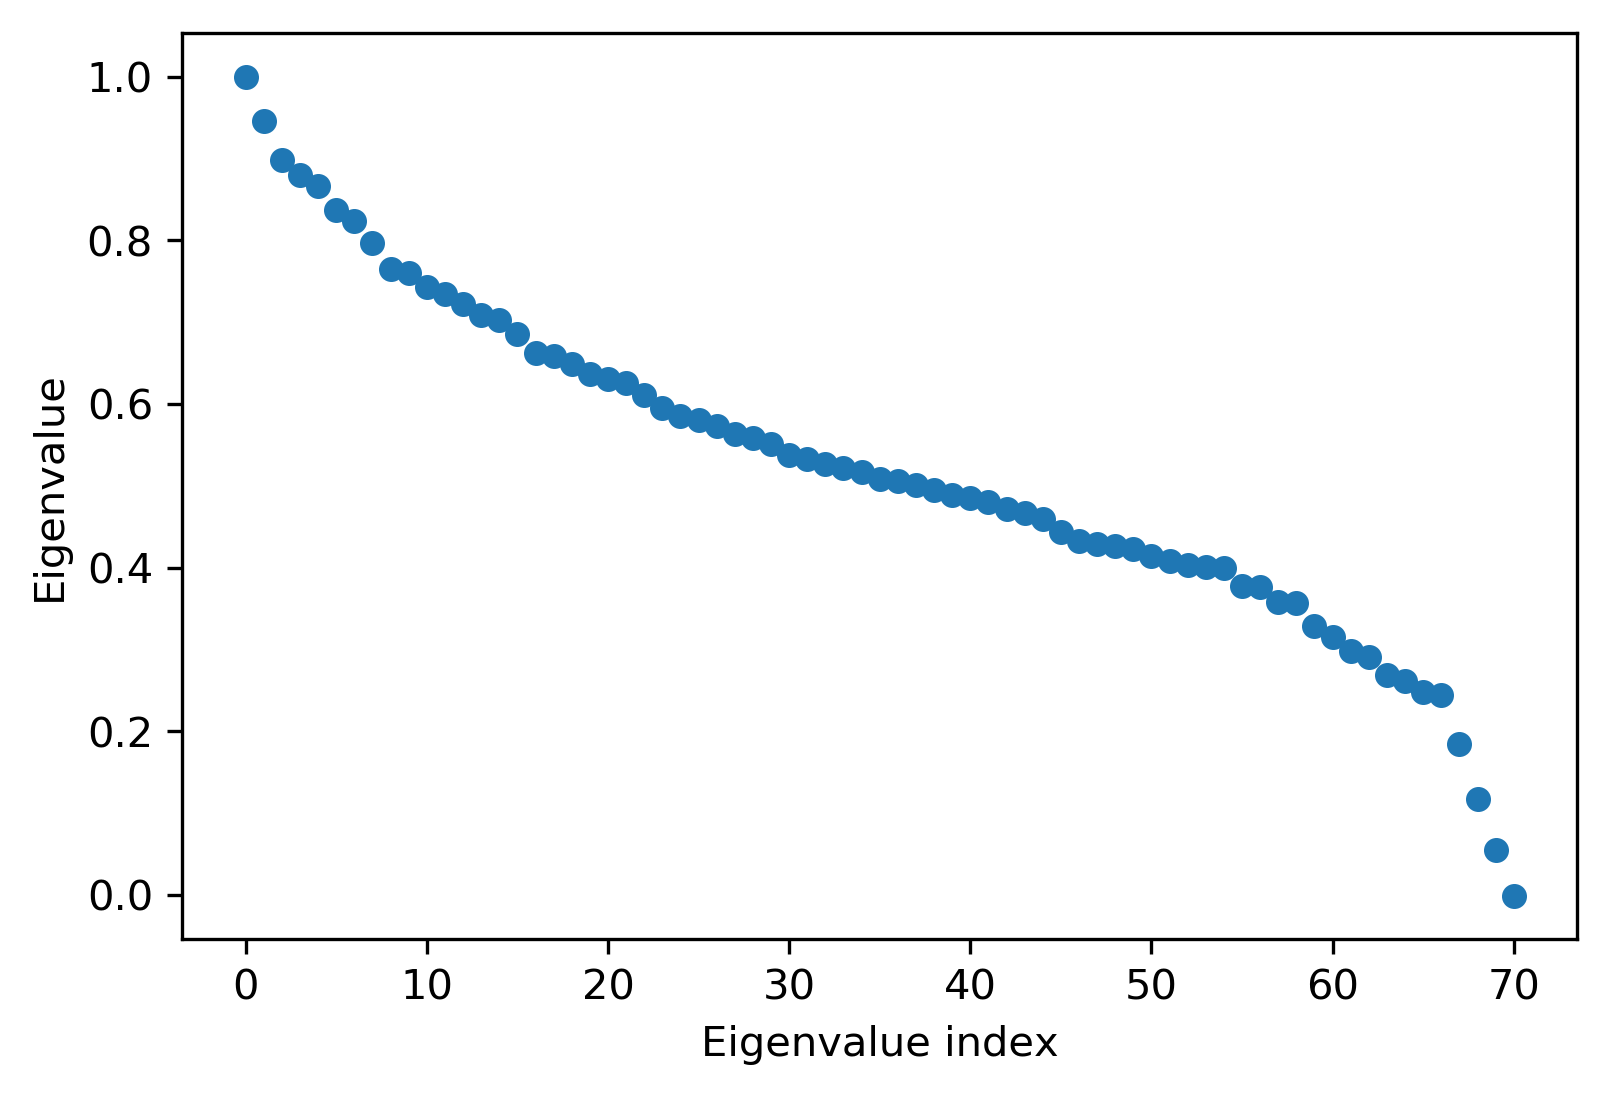

In [123]:
plt.figure(dpi=300)
plt.scatter(range(len(msm.eigenvalues())), msm.eigenvalues(), s=25)
plt.xlabel('Eigenvalue index')
plt.ylabel('Eigenvalue')

In [327]:
# no timescale separation - let's do minimum amount of states to get difference in populations between two systems
# of at least 10% population density shifted

In [47]:
pcca = msm.pcca(4)

In [48]:
msm_ins = pyemma.msm.estimate_markov_model(dtrajs[1000:1999], lag=200)

In [49]:
msm_ins_mut = pyemma.msm.estimate_markov_model(dtrajs[2999:3999], lag=200)

In [50]:
msm.active_set == msm_ins.active_set

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  """Entry point for launching an IPython kernel.


False

In [51]:
msm.active_set == msm_ins_mut.active_set

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  """Entry point for launching an IPython kernel.


False

In [52]:
len(msm.active_set), len(msm_ins.active_set), len(msm_ins_mut.active_set)

(71, 68, 70)

In [53]:
# active sets are NOT the same - have to modify pcca memberships from the joint msm accordingly:
# remove the states that are not in the individual msms

In [54]:
# populations - need to use fuzzy memberships!!

In [55]:
ins_pi = [0]*len(pcca.metastable_sets)

# fix the memberships to new active set
memberships = []

for i,state in enumerate(pcca.memberships):
    if msm.active_set[i] in msm_ins.active_set:
        memberships.append(state)        

for i in range(len(msm_ins.active_set)):
    for j, membership in enumerate(memberships[i]):
        ins_pi[j] += msm_ins.pi[i]*membership

In [56]:
ins_mut_pi = [0]*len(pcca.metastable_sets)

# fix the memberships to new active set
memberships = []

for i,state in enumerate(pcca.memberships):
    if msm.active_set[i] in msm_ins_mut.active_set:
        memberships.append(state)

for i in range(len(msm_ins_mut.active_set)):
    for j, membership in enumerate(pcca.memberships[i]):
        ins_mut_pi[j] += msm_ins_mut.pi[i]*membership

In [57]:
ins_pi

[0.14795787199434876,
 0.23861613383848018,
 0.3333715881535421,
 0.28005440601362885]

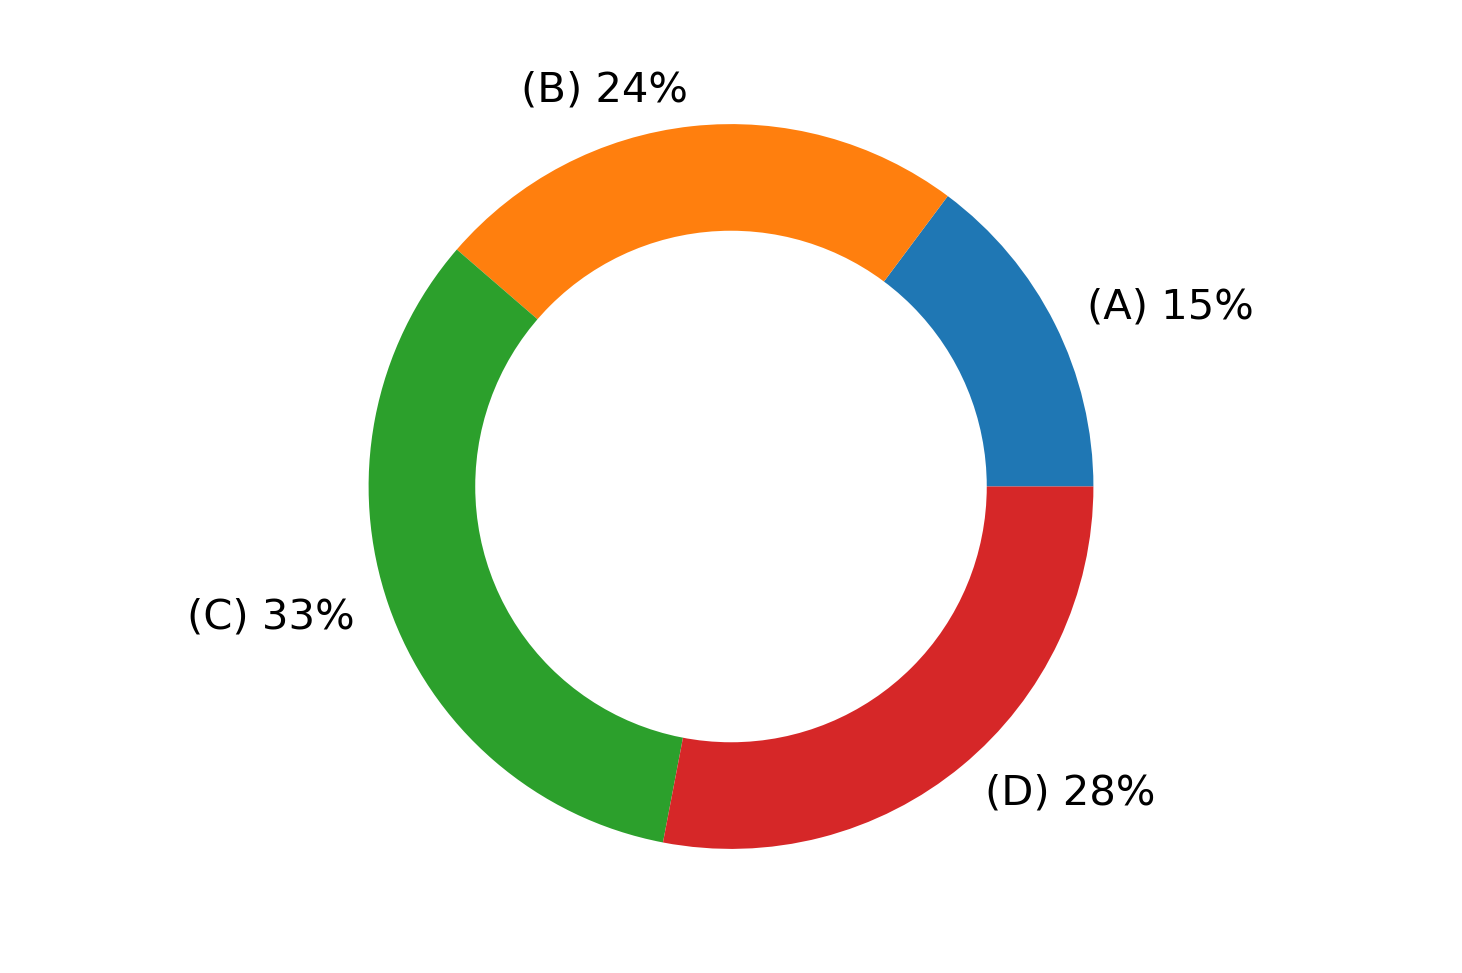

In [58]:
plt.figure(dpi=300)
plt.axis("equal")
# create data
size_of_groups = ins_pi

#colors = sns.color_palette("husl", 9)
# Create a pieplot
#plt.pie(size_of_groups, labels=[str(x*100)[:2]+'%' for x in size_of_groups])
plt.pie(size_of_groups, labels=['(A) 15%', '(B) 24%', '(C) 33%', '(D) 28%'])
 
# add a circle at the center
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
 
plt.show()

In [726]:
ins_mut_pi

[0.13218384104095746,
 0.3966525405095449,
 0.3090823190278574,
 0.16208129942164048]

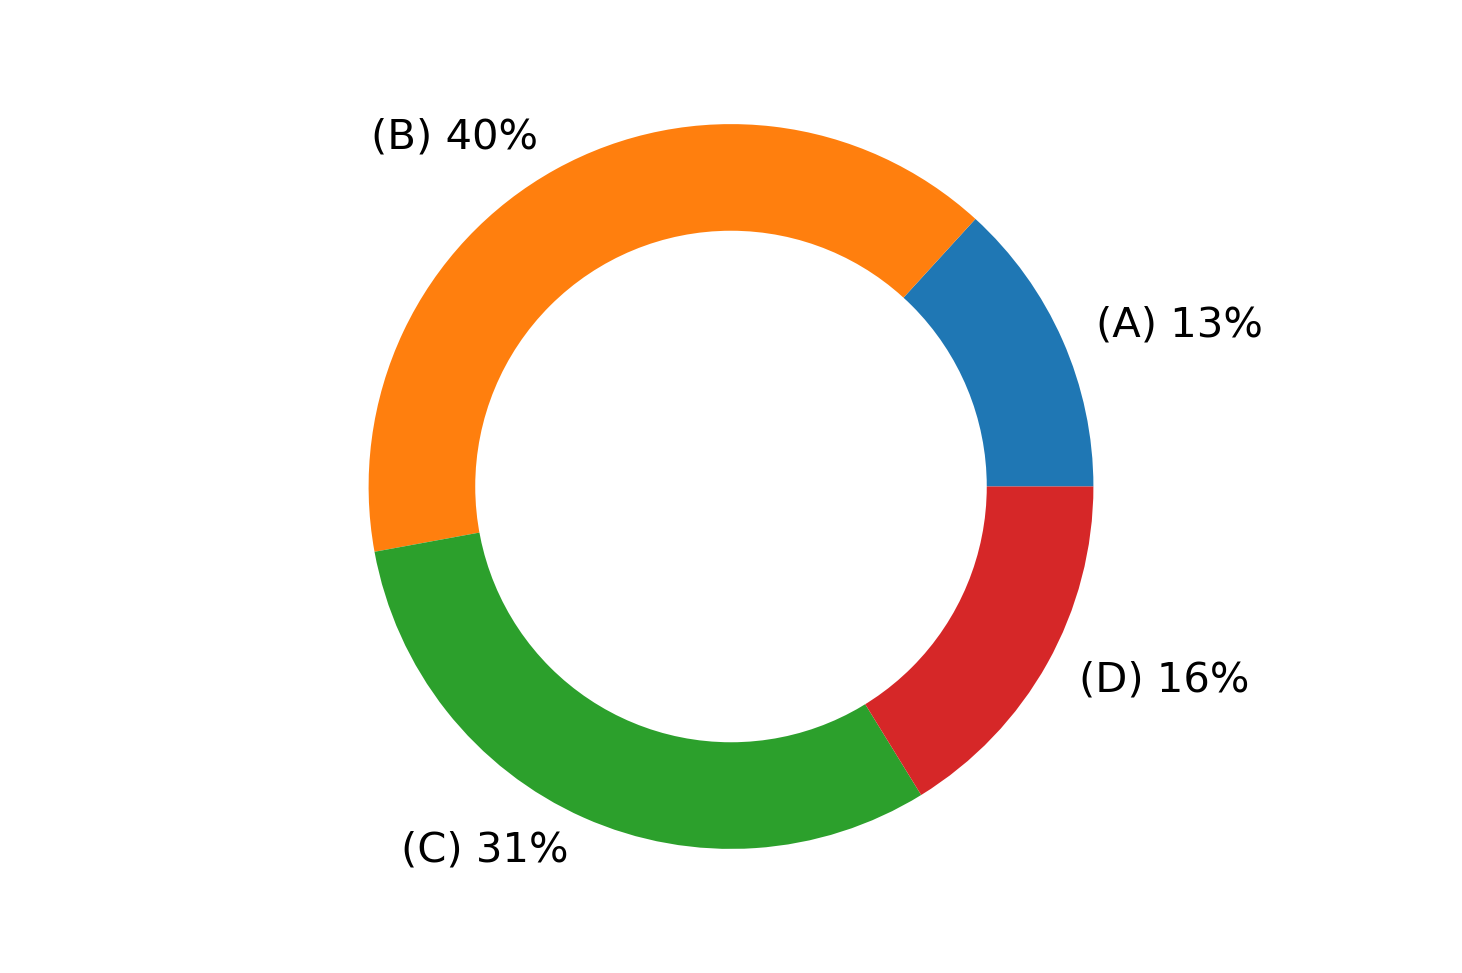

In [60]:
plt.figure(dpi=300)
plt.axis("equal")
# create data
size_of_groups = ins_mut_pi

#colors = sns.color_palette("husl", 9)
# Create a pieplot
#plt.pie(size_of_groups, labels=[str(x*100)[:2]+'%' for x in size_of_groups])
plt.pie(size_of_groups, labels=['(A) 13%', '(B) 40%', '(C) 31%', '(D) 16%'])
 
# add a circle at the center
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
 
plt.show()

In [728]:
diff = []

for i in range(len(ins_pi)):
    diff.append(np.abs(ins_pi[i]-ins_mut_pi[i]))
    
np.sum(diff)/2

0.15803640667106456

In [153]:
# ck test the individual msms - we're using the memberships from combined-msm pcca

In [729]:
# fix the memberships to new active set
memberships = []

for i,state in enumerate(pcca.memberships):
    if msm.active_set[i] in msm_ins.active_set:
        memberships.append(state)

cktest = msm_ins.cktest(4, n_jobs=8, memberships=memberships)

HBox(children=(HBox(children=(Label(value='estimating MaximumLikelihoodMSM'),), layout=Layout(max_width='35%', min_width='35%')), HBox(children=(IntProgress(value=0, max=9), HTML(value='')), layout=Layout(padding='0 0 0 20px'))), layout=Layout(display='flex', width='100%'))

25-03-19 01:05:31 pyemma.msm.estimators.maximum_likelihood_msm.MaximumLikelihoodMSM[13] WARNING  Ignored error during estimation: Active set is empty. Cannot estimate MSM.


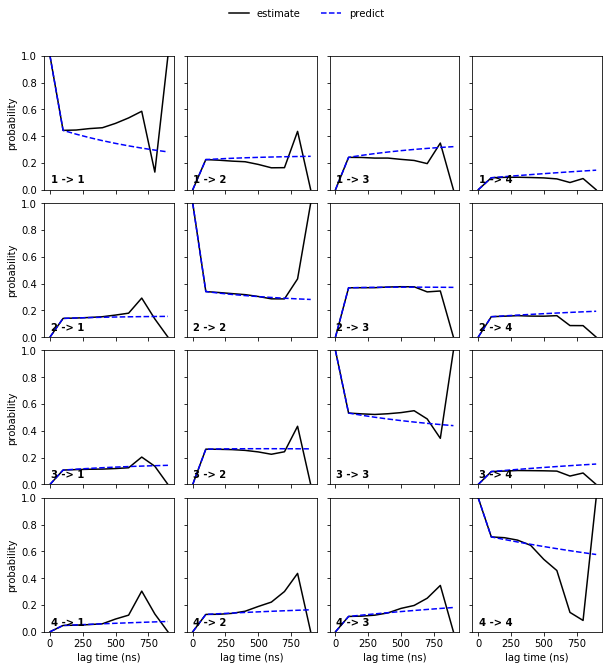

In [730]:
plt.figure(dpi=300)
pyemma.plots.plot_cktest(cktest, dt=0.5, units='ns')
plt.show()

In [731]:
# fix the memberships to new active set
memberships = []

for i,state in enumerate(pcca.memberships):
    if msm.active_set[i] in msm_ins_mut.active_set:
        memberships.append(state)

cktest = msm_ins_mut.cktest(4, n_jobs=8, memberships=memberships)

HBox(children=(HBox(children=(Label(value='estimating MaximumLikelihoodMSM'),), layout=Layout(max_width='35%', min_width='35%')), HBox(children=(IntProgress(value=0, max=9), HTML(value='')), layout=Layout(padding='0 0 0 20px'))), layout=Layout(display='flex', width='100%'))

25-03-19 01:05:34 pyemma.msm.estimators.maximum_likelihood_msm.MaximumLikelihoodMSM[14] WARNING  Ignored error during estimation: Active set is empty. Cannot estimate MSM.


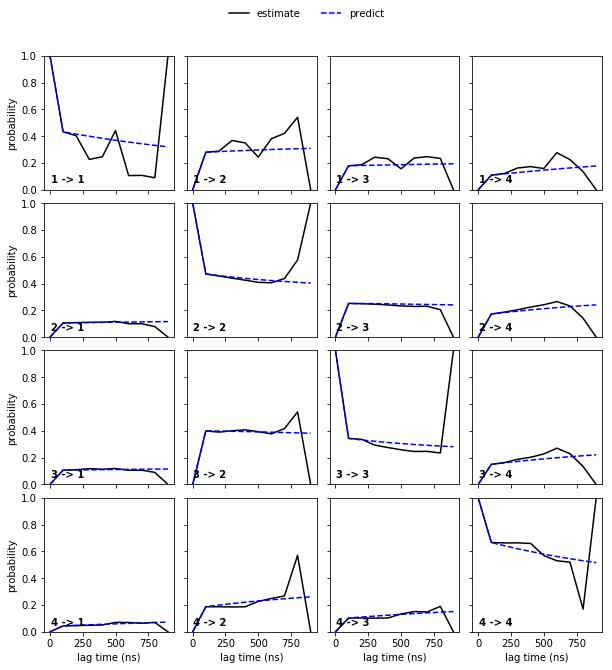

In [732]:
plt.figure(dpi=300)
pyemma.plots.plot_cktest(cktest, dt=0.5, units='ns')
plt.show()

In [425]:
# now samples from microstates  - in another notebook!
# then here assemble macrostate samples, then calculate contact maps for them and plot
# on the structures

In [795]:
msm_wt = pyemma.msm.estimate_markov_model(dtrajs[:1000], lag=200)
msm_ins = pyemma.msm.estimate_markov_model(dtrajs[1000:1999], lag=200)
msm_mut = pyemma.msm.estimate_markov_model(dtrajs[1999:2999], lag=200)
msm_ins_mut = pyemma.msm.estimate_markov_model(dtrajs[2999:3999], lag=200)

In [ ]:
### wt

In [843]:
ls randforest_distall_wt_msm_samples | wc -l

      30


In [844]:
samples = [md.load('randforest_distall_wt_msm_samples/%d.pdb' % i) for i in range(30)]

In [845]:
dtrajs_ = list(np.concatenate([dtrajs[:1000], dtrajs[1999:2999]]))
msm = pyemma.msm.estimate_markov_model(dtrajs_, lag=200)

In [846]:
pcca = msm.pcca(3)

In [847]:
np.random.seed(7)
meta_samples = []

# fix active set to the individual msm one - not needed for wt and mut, but doing for consistency
active_set_fix = []

for i in msm_wt.active_set:
    active_set_fix.append(np.argwhere(msm.active_set == i)[0,0])

active_set_fix = np.array(active_set_fix)

for state in pcca.output_probabilities:
    # fix active set and renormalize
    state = state[active_set_fix]
    state = state / np.sum(state)
    microstates = np.random.choice(range(len(state)), 100, p=state)
    for i, microstate in enumerate(microstates):
        microstate_frame = np.random.choice(range(25))
        if i == 0:
            traj = samples[microstate][microstate_frame]
        else:
            traj = md.join([traj, samples[microstate][microstate_frame]])
    meta_samples.append(traj)

In [848]:
meta_samples

[<mdtraj.Trajectory with 100 frames, 5802 atoms, 360 residues, and unitcells at 0x1a1f8d5748>,
 <mdtraj.Trajectory with 100 frames, 5802 atoms, 360 residues, and unitcells at 0x1a1d4de588>,
 <mdtraj.Trajectory with 100 frames, 5802 atoms, 360 residues, and unitcells at 0x1a3bd47860>]

In [849]:
# mkdir randforest_distall_wt_msm_samples_meta

In [850]:
for i,traj in enumerate(meta_samples):
    traj.save('randforest_distall_wt_msm_samples_meta/%d.pdb' % i)

In [851]:
#### ins

In [852]:
ls randforest_distall_ins_msm_samples | wc -l

      68


In [853]:
samples = [md.load('randforest_distall_ins_msm_samples/%d.pdb' % i) for i in range(68)]

In [854]:
dtrajs_ = list(np.concatenate([dtrajs[1000:1999], dtrajs[2999:3999]]))
msm = pyemma.msm.estimate_markov_model(dtrajs_, lag=200)

In [855]:
pcca = msm.pcca(4)

In [856]:
np.random.seed(7)
meta_samples = []

# fix active set to the individual msm one
active_set_fix = []

for i in msm_ins.active_set:
    active_set_fix.append(np.argwhere(msm.active_set == i)[0,0])

active_set_fix = np.array(active_set_fix)

for state in pcca.output_probabilities:
    # fix active set and renormalize
    state = state[active_set_fix]
    state = state / np.sum(state)
    microstates = np.random.choice(range(len(state)), 100, p=state)
    for i, microstate in enumerate(microstates):
        microstate_frame = np.random.choice(range(25))
        if i == 0:
            traj = samples[microstate][microstate_frame]
        else:
            traj = md.join([traj, samples[microstate][microstate_frame]])
    meta_samples.append(traj)

In [857]:
meta_samples

[<mdtraj.Trajectory with 100 frames, 5816 atoms, 361 residues, and unitcells at 0x1a3c460e10>,
 <mdtraj.Trajectory with 100 frames, 5816 atoms, 361 residues, and unitcells at 0x1a4ba54ba8>,
 <mdtraj.Trajectory with 100 frames, 5816 atoms, 361 residues, and unitcells at 0x1a3c0d8e10>,
 <mdtraj.Trajectory with 100 frames, 5816 atoms, 361 residues, and unitcells at 0x1a5ff5c6d8>]

In [858]:
# mkdir randforest_distall_ins_msm_samples_meta

In [859]:
for i,traj in enumerate(meta_samples):
    traj.save('randforest_distall_ins_msm_samples_meta/%d.pdb' % i)

In [860]:
#### mut

In [861]:
ls randforest_distall_mut_msm_samples | wc -l

      30


In [863]:
samples = [md.load('randforest_distall_mut_msm_samples/%d.pdb' % i) for i in range(30)]

In [864]:
dtrajs_ = list(np.concatenate([dtrajs[:1000], dtrajs[1999:2999]]))
msm = pyemma.msm.estimate_markov_model(dtrajs_, lag=200)

In [865]:
pcca = msm.pcca(3)

In [866]:
np.random.seed(7)
meta_samples = []

# fix active set to the individual msm one - not needed for wt and mut, but doing for consistency
active_set_fix = []

for i in msm_mut.active_set:
    active_set_fix.append(np.argwhere(msm.active_set == i)[0,0])

active_set_fix = np.array(active_set_fix)

for state in pcca.output_probabilities:
    # fix active set and renormalize
    state = state[active_set_fix]
    state = state / np.sum(state)
    microstates = np.random.choice(range(len(state)), 100, p=state)
    for i, microstate in enumerate(microstates):
        microstate_frame = np.random.choice(range(25))
        if i == 0:
            traj = samples[microstate][microstate_frame]
        else:
            traj = md.join([traj, samples[microstate][microstate_frame]])
    meta_samples.append(traj)

In [867]:
meta_samples

[<mdtraj.Trajectory with 100 frames, 5802 atoms, 360 residues, and unitcells at 0x1a590dc780>,
 <mdtraj.Trajectory with 100 frames, 5802 atoms, 360 residues, and unitcells at 0x1a203a6978>,
 <mdtraj.Trajectory with 100 frames, 5802 atoms, 360 residues, and unitcells at 0x1a53ab2550>]

In [868]:
# mkdir randforest_distall_mut_msm_samples_meta

In [869]:
for i,traj in enumerate(meta_samples):
    traj.save('randforest_distall_mut_msm_samples_meta/%d.pdb' % i)

In [ ]:
#### ins_mut

In [870]:
ls randforest_distall_ins_mut_msm_samples | wc -l

      70


In [871]:
samples = [md.load('randforest_distall_ins_mut_msm_samples/%d.pdb' % i) for i in range(70)]

In [872]:
dtrajs_ = list(np.concatenate([dtrajs[1000:1999], dtrajs[2999:3999]]))
msm = pyemma.msm.estimate_markov_model(dtrajs_, lag=200)

In [873]:
pcca = msm.pcca(4)

In [874]:
np.random.seed(7)
meta_samples = []

# fix active set to the individual msm one
active_set_fix = []

for i in msm_ins_mut.active_set:
    active_set_fix.append(np.argwhere(msm.active_set == i)[0,0])

active_set_fix = np.array(active_set_fix)

for state in pcca.output_probabilities:
    # fix active set and renormalize
    state = state[active_set_fix]
    state = state / np.sum(state)
    microstates = np.random.choice(range(len(state)), 100, p=state)
    for i, microstate in enumerate(microstates):
        microstate_frame = np.random.choice(range(25))
        if i == 0:
            traj = samples[microstate][microstate_frame]
        else:
            traj = md.join([traj, samples[microstate][microstate_frame]])
    meta_samples.append(traj)

In [875]:
meta_samples

[<mdtraj.Trajectory with 100 frames, 5816 atoms, 361 residues, and unitcells at 0x1a3b813ba8>,
 <mdtraj.Trajectory with 100 frames, 5816 atoms, 361 residues, and unitcells at 0x1a5779b898>,
 <mdtraj.Trajectory with 100 frames, 5816 atoms, 361 residues, and unitcells at 0x1a5c5a4b38>,
 <mdtraj.Trajectory with 100 frames, 5816 atoms, 361 residues, and unitcells at 0x1a203b96a0>]

In [876]:
# mkdir randforest_distall_ins_mut_msm_samples_meta

In [877]:
for i,traj in enumerate(meta_samples):
    traj.save('randforest_distall_ins_mut_msm_samples_meta/%d.pdb' % i)

In [880]:
##########################
#### MACROSTATE ANALYSIS

In [ ]:
# CONTACT MAPS

In [882]:
# for each macrostate, calculate the mean contact map

In [1013]:
# as reference let's have the weighted average of wt

In [ ]:
### WT

In [ ]:
# # combined code for easy copy
# meta_samples = []

# for i in range(3):
#     meta_samples.append(md.load('randforest_distall_wt_msm_samples_meta/%d.pdb' % i))
    
    
# meta_contacts = []

# for i in range(3):
#     contacts, respairs = md.compute_contacts(meta_samples[i])
#     contacts = np.mean((contacts < 0.4).astype('float'), axis=0)
#     meta_contacts.append(contacts)

In [1280]:
meta_samples = []

for i in range(3):
    meta_samples.append(md.load('randforest_distall_wt_msm_samples_meta/%d.pdb' % i))

In [1281]:
meta_contacts = []

for i in range(3):
    contacts, respairs = md.compute_contacts(meta_samples[i])
    contacts = np.mean((contacts < 0.4).astype('float'), axis=0)
    meta_contacts.append(contacts)

In [1282]:
np.save('meta_contacts_wt.npy', meta_contacts)
# meta_contacts = np.load('meta_contacts_wt.npy')

In [1284]:
np.save('respairs_wt.npy', respairs)
#respairs = np.load('respairs_wt.npy')

In [ ]:
# reference = np.average(meta_contacts, axis=0, weights=wt_pi)

In [1285]:
reference = np.load('state_contacts_wt_reference.npy')
# np.save('state_contacts_wt_reference', reference)

In [1051]:
### now for each macrostate subtract the reference, and take absolute sum of changes per residue to plot on structure

In [1286]:
meta_res_sums = []

for contacts in meta_contacts:
    residue_sums = [0]*357
    for i, respair in enumerate(respairs):
        residue_sums[respair[0]] += np.abs(contacts[i] - reference[i])
        residue_sums[respair[1]] += np.abs(contacts[i] - reference[i])
    meta_res_sums.append(np.array(residue_sums))

In [1287]:
# save these for b-factor coloring in pymol

In [1288]:
np.save('state_contacts_change_wt.npy', meta_res_sums)

In [1289]:
np.savetxt('state_contacts_change_wt0.txt', meta_res_sums[0])
np.savetxt('state_contacts_change_wt1.txt', meta_res_sums[1])
np.savetxt('state_contacts_change_wt2.txt', meta_res_sums[2])

In [1290]:
# coloring scale

In [1291]:
np.max(meta_res_sums[0][15:])

1.6880325986107965

In [1292]:
np.max(meta_res_sums[1][15:])

0.79250880853263

In [1293]:
np.max(meta_res_sums[2][15:])

0.9486229610516465

In [957]:
### MUT

In [1256]:
meta_samples = []

for i in range(3):
    meta_samples.append(md.load('randforest_distall_mut_msm_samples_meta/%d.pdb' % i))

In [1257]:
meta_contacts = []

for i in range(3):
    contacts, respairs = md.compute_contacts(meta_samples[i])
    contacts = np.mean((contacts < 0.4).astype('float'), axis=0)
    meta_contacts.append(contacts)

In [1260]:
#np.save('meta_contacts_mut.npy', meta_contacts)
meta_contacts = np.load('meta_contacts_mut.npy')

In [1258]:
#np.save('respairs_mut.npy', respairs)
respairs = np.load('respairs_mut.npy')

In [1261]:
reference = np.load('state_contacts_wt_reference.npy')

In [1262]:
meta_res_sums = []

for contacts in meta_contacts:
    residue_sums = [0]*357
    for i, respair in enumerate(respairs):
        residue_sums[respair[0]] += np.abs(contacts[i] - reference[i])
        residue_sums[respair[1]] += np.abs(contacts[i] - reference[i])
    meta_res_sums.append(np.array(residue_sums))

In [1263]:
np.save('state_contacts_change_mut.npy', meta_res_sums)

In [1264]:
np.savetxt('state_contacts_change_mut0.txt', meta_res_sums[0])
np.savetxt('state_contacts_change_mut1.txt', meta_res_sums[1])
np.savetxt('state_contacts_change_mut2.txt', meta_res_sums[2])

In [1265]:
np.max(meta_res_sums[0][15:])

2.3153172035459675

In [1266]:
np.max(meta_res_sums[1][15:])

1.7424134465653274

In [1267]:
np.max(meta_res_sums[2][15:])

1.7105274587996473

In [1036]:
##### INS

In [1123]:
meta_samples = []

for i in range(4):
    meta_samples.append(md.load('randforest_distall_ins_msm_samples_meta/%d.pdb' % i))

In [1124]:
meta_contacts = []

for i in range(4):
    contacts, respairs = md.compute_contacts(meta_samples[i])
    contacts = np.mean((contacts < 0.4).astype('float'), axis=0)
    meta_contacts.append(contacts)

In [1247]:
# np.save('meta_contacts_ins.npy', meta_contacts)
meta_contacts = np.load('meta_contacts_ins.npy')

In [1248]:
#np.save('respairs_ins.npy', respairs)
respairs = np.load('respairs_ins.npy')

In [1249]:
reference = np.load('state_contacts_wt_reference.npy')

In [1205]:
# deal with the insertion indexing situation
respairs_ = []
respairs_indexes = []

for i in range(357):
    print(i)
    for j in range(i+3, 357):
        if i >= 54: 
            i_ = i+1 
        else: 
            i_ = i 
        if j >= 54: 
            j_ = j+1 
        else:
            j_ = j 
        respairs_.append([i_,j_])
        respairs_indexes.append(np.argwhere((respairs == (i_,j_)).all(axis=1))[0,0])

respairs_ = np.array(respairs_)        
respairs_indexes = np.array(respairs_indexes)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [1250]:
meta_res_sums = []

for contacts in meta_contacts:
    contacts_ = contacts[respairs_indexes]
    residue_sums = [0]*358
    for i, respair in enumerate(respairs_):
        residue_sums[respair[0]] += np.abs(contacts_[i] - reference[i])
        residue_sums[respair[1]] += np.abs(contacts_[i] - reference[i])
    meta_res_sums.append(np.array(residue_sums))

In [1223]:
np.save('state_contacts_change_ins.npy', meta_res_sums)

In [1254]:
np.savetxt('state_contacts_change_ins0.txt', meta_res_sums[0])
np.savetxt('state_contacts_change_ins1.txt', meta_res_sums[1])
np.savetxt('state_contacts_change_ins2.txt', meta_res_sums[2])
np.savetxt('state_contacts_change_ins3.txt', meta_res_sums[3])

In [1251]:
np.max(meta_res_sums[0][15:])

6.123001321294093

In [1252]:
np.max(meta_res_sums[1][15:])

6.373001321294093

In [1253]:
np.max(meta_res_sums[2][15:])

6.213001321294093

In [1230]:
##### INS_MUT

In [1268]:
meta_samples = []

for i in range(4):
    meta_samples.append(md.load('randforest_distall_ins_mut_msm_samples_meta/%d.pdb' % i))

In [1269]:
meta_contacts = []

for i in range(4):
    contacts, respairs = md.compute_contacts(meta_samples[i])
    contacts = np.mean((contacts < 0.4).astype('float'), axis=0)
    meta_contacts.append(contacts)

In [1270]:
np.save('meta_contacts_ins_mut.npy', meta_contacts)
#meta_contacts = np.load('meta_contacts_ins_mut.npy')

In [1271]:
np.save('respairs_ins_mut.npy', respairs)
#respairs = np.load('respairs_ins_mut.npy')

In [1272]:
reference = np.load('state_contacts_wt_reference.npy')

In [1273]:
# deal with the insertion indexing situation
respairs_ = []
respairs_indexes = []

for i in range(357):
    print(i)
    for j in range(i+3, 357):
        if i >= 54: 
            i_ = i+1 
        else: 
            i_ = i 
        if j >= 54: 
            j_ = j+1 
        else:
            j_ = j 
        respairs_.append([i_,j_])
        respairs_indexes.append(np.argwhere((respairs == (i_,j_)).all(axis=1))[0,0])

respairs_ = np.array(respairs_)        
respairs_indexes = np.array(respairs_indexes)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [1274]:
meta_res_sums = []

for contacts in meta_contacts:
    contacts_ = contacts[respairs_indexes]
    residue_sums = [0]*358
    for i, respair in enumerate(respairs_):
        residue_sums[respair[0]] += np.abs(contacts_[i] - reference[i])
        residue_sums[respair[1]] += np.abs(contacts_[i] - reference[i])
    meta_res_sums.append(np.array(residue_sums))

In [1275]:
np.save('state_contacts_change_ins_mut.npy', meta_res_sums)

In [1276]:
np.savetxt('state_contacts_change_ins_mut0.txt', meta_res_sums[0])
np.savetxt('state_contacts_change_ins_mut1.txt', meta_res_sums[1])
np.savetxt('state_contacts_change_ins_mut2.txt', meta_res_sums[2])
np.savetxt('state_contacts_change_ins_mut3.txt', meta_res_sums[3])

In [1277]:
np.max(meta_res_sums[0][15:])

6.0558623760096335

In [1278]:
np.max(meta_res_sums[1][15:])

6.365862376009633

In [1279]:
np.max(meta_res_sums[2][15:])

6.325862376009633

In [1297]:
# DONE with making pictures in pymol - movies (switch between macrostates on the most probable path) TODO later 

In [1298]:
# now CALCULATE distances/angle for the states, plot distributions of all states per system

In [ ]:
##### WT

In [1406]:
meta_samples = []

for i in range(3):
    meta_samples.append(md.load('randforest_distall_wt_msm_samples_meta/%d.pdb' % i))

In [1311]:
contacts = [[67,164], [50,67], [163,50], [82,71], [71,164], [164,143], [143,206], [35,48], [48,152], [151,153], [151,104], [153,104], [104,213], [213,217]]
meta_contacts = []

for i in range(3):
    contacts_, respairs = md.compute_contacts(meta_samples[i], contacts=contacts)
    meta_contacts.append(contacts_)

In [ ]:
# np.save('meta_specificcontacts_wt', meta_contacts)

In [1401]:
# domain closure angle

In [1410]:
# functions - only first time
def calc_helix_axes(coords):
  # Do lsq fitting of x, y and z values for each helix
  coord1 = coords[0]
  coord2 = coords[1]
  if (len(coord1) > 0 and len(coord2) > 0):
    coord1 = np.asarray(coord1)
    coord2 = np.asarray(coord2)
    count1 = len(coord1)
    count2 = len(coord2)

    start1 = []
    end1 = []
    vect1 = []
    start2 = []
    end2 = []
    vect2 = []

    (s,e) = lsq(range(count1),coord1[:,0])
    start1.append(s)
    end1.append(e)
    (s,e) = lsq(range(count1),coord1[:,1])
    start1.append(s)
    end1.append(e)
    (s,e) = lsq(range(count1),coord1[:,2])
    start1.append(s)
    end1.append(e)

    vect1.append(end1[0] - start1[0])
    vect1.append(end1[1] - start1[1])
    vect1.append(end1[2] - start1[2])

    (s,e) = lsq(range(count2),coord2[:,0])
    start2.append(s)
    end2.append(e)
    (s,e) = lsq(range(count2),coord2[:,1])
    start2.append(s)
    end2.append(e)
    (s,e) = lsq(range(count2),coord2[:,2])
    start2.append(s)
    end2.append(e)

    vect2.append(end2[0] - start2[0])
    vect2.append(end2[1] - start2[1])
    vect2.append(end2[2] - start2[2])

    start1 = np.asarray(start1)
    start2 = np.asarray(start2)
    vect1 = np.asarray(vect1)
    vect2 = np.asarray(vect2)

    ang1_2 = angle(vect1,vect2)
    dist1_2 = distance(start1,vect1,start2,vect2)

    return ang1_2, dist1_2

  else:
    print("Missing coordinates for one or both helices.  Check your input.")

def lsq(x,y):
  slope,intcpt =  np.polyfit(x,y,1,full=False)
  first_point = slope*x[0]+intcpt
  last_point = slope*x[-1]+intcpt
  return first_point,last_point

def angle(v1,v2):
  ang = np.arccos(np.dot(v1,v2)/(magvect(v1)*magvect(v2)))
  ang = ang*180/np.pi
  return ang  
  
def magvect(v):
  magnitude = np.sqrt(v[0]*v[0] + v[1]*v[1] + v[2]*v[2])
  return magnitude
 
def distance(start1,v1,start2,v2):
  cross_prod = np.cross(v1,v2)
  mx = magvect(cross_prod)
  norm = cross_prod/mx
  diff = start1 - start2
  dist = np.fabs(np.dot(norm,diff))
  return dist
  
# end functions

In [1411]:
meta_angles = []

for i in range(3):
    traj = meta_samples[i]
    traj = traj.atom_slice(traj.top.select('name C or name O'))
    coord1 = traj.atom_slice(traj.top.select('resid >= 57 and resid <= 73')).xyz
    coord2 = traj.atom_slice(traj.top.select('resid >= 119 and resid <= 139')).xyz
    angles = []
    for j in range(len(traj)):
        angles.append(calc_helix_axes([coord1[j], coord2[j]])[0])
    meta_angles.append(angles)    

In [1413]:
np.save('meta_specificangles_wt', meta_angles)

In [ ]:
#### MUT

In [1414]:
meta_samples = []

for i in range(3):
    meta_samples.append(md.load('randforest_distall_mut_msm_samples_meta/%d.pdb' % i))

In [1353]:
contacts = [[67,164], [50,67], [163,50], [82,71], [71,164], [164,143], [143,206], [35,48], [48,152], [151,153], [151,104], [153,104], [104,213], [213,217]]
meta_contacts = []

for i in range(3):
    contacts_, respairs = md.compute_contacts(meta_samples[i], contacts=contacts)
    meta_contacts.append(contacts_)

In [1354]:
# np.save('meta_specificcontacts_mut', meta_contacts)

In [1415]:
meta_angles = []

for i in range(3):
    traj = meta_samples[i]
    traj = traj.atom_slice(traj.top.select('name C or name O'))
    coord1 = traj.atom_slice(traj.top.select('resid >= 57 and resid <= 73')).xyz
    coord2 = traj.atom_slice(traj.top.select('resid >= 119 and resid <= 139')).xyz
    angles = []
    for j in range(len(traj)):
        angles.append(calc_helix_axes([coord1[j], coord2[j]])[0])
    meta_angles.append(angles)    

In [1416]:
np.save('meta_specificangles_mut', meta_angles)

In [1355]:
#### INS

In [1417]:
meta_samples = []

for i in range(4):
    meta_samples.append(md.load('randforest_distall_ins_msm_samples_meta/%d.pdb' % i))

In [1358]:
contacts = [[68,165], [50,68], [164,50], [83,72], [72,165], [165,144], [144,207], [35,48], [48,153], [152,154], [152,105], [154,105], [105,214], [214,218]]
meta_contacts = []

for i in range(4):
    contacts_, respairs = md.compute_contacts(meta_samples[i], contacts=contacts)
    meta_contacts.append(contacts_)

In [1359]:
np.save('meta_specificcontacts_ins', meta_contacts)

In [1418]:
meta_angles = []

for i in range(4):
    traj = meta_samples[i]
    traj = traj.atom_slice(traj.top.select('name C or name O'))
    coord1 = traj.atom_slice(traj.top.select('resid >= 58 and resid <= 74')).xyz
    coord2 = traj.atom_slice(traj.top.select('resid >= 120 and resid <= 140')).xyz
    angles = []
    for j in range(len(traj)):
        angles.append(calc_helix_axes([coord1[j], coord2[j]])[0])
    meta_angles.append(angles)    

In [1419]:
np.save('meta_specificangles_ins', meta_angles)

In [1360]:
#### INS_MUT

In [1420]:
meta_samples = []

for i in range(4):
    meta_samples.append(md.load('randforest_distall_ins_mut_msm_samples_meta/%d.pdb' % i))

In [1362]:
contacts = [[68,165], [50,68], [164,50], [83,72], [72,165], [165,144], [144,207], [35,48], [48,153], [152,154], [152,105], [154,105], [105,214], [214,218]]
meta_contacts = []

for i in range(4):
    contacts_, respairs = md.compute_contacts(meta_samples[i], contacts=contacts)
    meta_contacts.append(contacts_)

In [1363]:
np.save('meta_specificcontacts_ins_mut', meta_contacts)

In [1421]:
meta_angles = []

for i in range(4):
    traj = meta_samples[i]
    traj = traj.atom_slice(traj.top.select('name C or name O'))
    coord1 = traj.atom_slice(traj.top.select('resid >= 58 and resid <= 74')).xyz
    coord2 = traj.atom_slice(traj.top.select('resid >= 120 and resid <= 140')).xyz
    angles = []
    for j in range(len(traj)):
        angles.append(calc_helix_axes([coord1[j], coord2[j]])[0])
    meta_angles.append(angles)    

In [1422]:
np.save('meta_specificangles_ins_mut', meta_angles)

In [ ]:
###### PLOTTING

In [1]:
import seaborn as sns
sns.set_style('ticks')
sns.set_context("notebook")
import matplotlib.patches as mpatches

In [4]:
# #meta_contacts = np.load('meta_specificcontacts_wt.npy')
# #meta_contacts = np.load('meta_specificcontacts_mut.npy')
# meta_contacts = np.load('meta_specificcontacts_ins.npy')
# #meta_contacts = np.load('meta_specificcontacts_ins_mut.npy')

In [5]:
# plt.figure(dpi=300)

# sns.distplot(meta_contacts[0][:,0]*10)
# sns.distplot(meta_contacts[1][:,0]*10)
# sns.distplot(meta_contacts[2][:,0]*10)
# sns.distplot(meta_contacts[3][:,0]*10)

# plt.xlabel('E69-F166 distance ($\AA$)')
# plt.ylabel('Probability density')
# plt.xlim((2,10))

# # patch1 = mpatches.Patch(color='blue', label='WT')
# # patch2 = mpatches.Patch(color='orange', label='74N')
# # plt.legend(handles=[patch1, patch2])

In [6]:
# plt.figure(dpi=300)

# sns.distplot(meta_contacts[0][:,1]*10)
# sns.distplot(meta_contacts[1][:,1]*10)
# sns.distplot(meta_contacts[2][:,1]*10)
# sns.distplot(meta_contacts[3][:,1]*10)

# plt.xlabel('K52-E69 distance ($\AA$)')
# plt.ylabel('Probability density')
# plt.xlim((2,10))

In [7]:
# plt.figure(dpi=300)

# sns.distplot(meta_contacts[0][:,2]*10)
# sns.distplot(meta_contacts[1][:,2]*10)
# sns.distplot(meta_contacts[2][:,2]*10)
# sns.distplot(meta_contacts[3][:,2]*10)

# plt.xlabel('D165-K52 distance ($\AA$)')
# plt.ylabel('Probability density')
# plt.xlim((2,10))

In [8]:
# plt.figure(dpi=300)

# sns.distplot(meta_contacts[0][:,7]*10)
# sns.distplot(meta_contacts[1][:,7]*10)
# sns.distplot(meta_contacts[2][:,7]*10)
# sns.distplot(meta_contacts[3][:,7]*10)

# plt.xlabel('V37-A50 distance ($\AA$)')
# plt.ylabel('Probability density')
# plt.xlim((2,10))

In [9]:
# plt.figure(dpi=300)

# sns.distplot(meta_contacts[0][:,8]*10)
# sns.distplot(meta_contacts[1][:,8]*10)
# sns.distplot(meta_contacts[2][:,8]*10)
# sns.distplot(meta_contacts[3][:,8]*10)

# plt.xlabel('A50-L154 distance ($\AA$)')
# plt.ylabel('Probability density')
# plt.xlim((4,12))

In [10]:
# plt.figure(dpi=300)

# sns.distplot(meta_contacts[0][:,12]*10)
# sns.distplot(meta_contacts[1][:,12]*10)
# sns.distplot(meta_contacts[2][:,12]*10)
# sns.distplot(meta_contacts[3][:,12]*10)

# plt.xlabel('M106-I215 distance ($\AA$)')
# plt.ylabel('Probability density')
# plt.xlim((12,18))

In [11]:
meta_angles = np.load('meta_specificangles_wt.npy')
#meta_angles = np.load('meta_specificangles_mut.npy')
#meta_angles = np.load('meta_specificangles_ins.npy')
#meta_angles = np.load('meta_specificangles_ins_mut.npy')

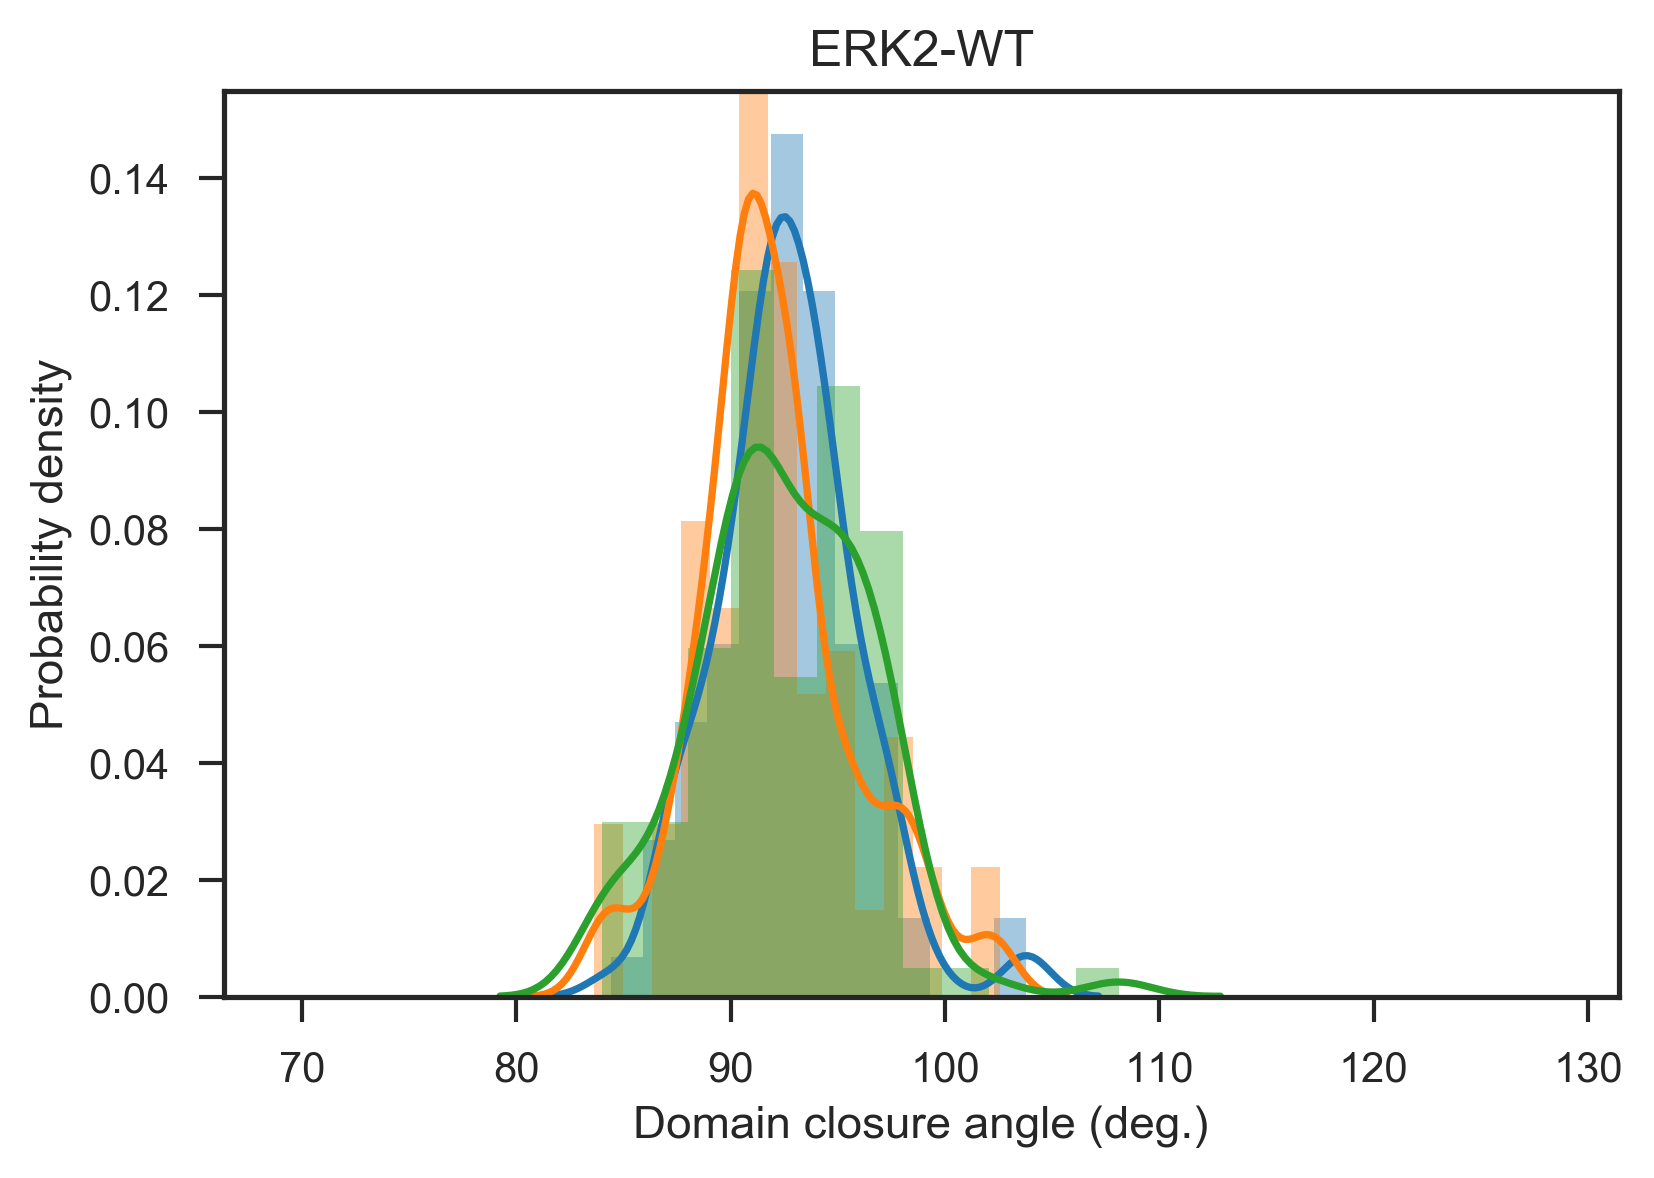

92.68062063540496 92.11251797338603 92.48781340217666
3.2751793522665085 3.691654958286787 4.050611624664712


In [61]:
meta_angles = np.load('meta_specificangles_wt.npy')
#meta_angles = np.load('meta_specificangles_mut.npy')
#meta_angles = np.load('meta_specificangles_ins.npy')
#meta_angles = np.load('meta_specificangles_ins_mut.npy')

plt.figure(dpi=300)

sns.distplot(meta_angles[0])
sns.distplot(meta_angles[1])
sns.distplot(meta_angles[2])
#sns.distplot(meta_angles[3])

plt.xlabel('Domain closure angle (deg.)')
plt.ylabel('Probability density')
plt.title('ERK2-WT')
plt.xlim((66.33934120618196, 131.42332912120588)) # same as for the main all-4-systems-distributions figure

plt.show()

print(np.mean(meta_angles[0]), np.mean(meta_angles[1]), np.mean(meta_angles[2]))
print(np.std(meta_angles[0]), np.std(meta_angles[1]), np.std(meta_angles[2]))

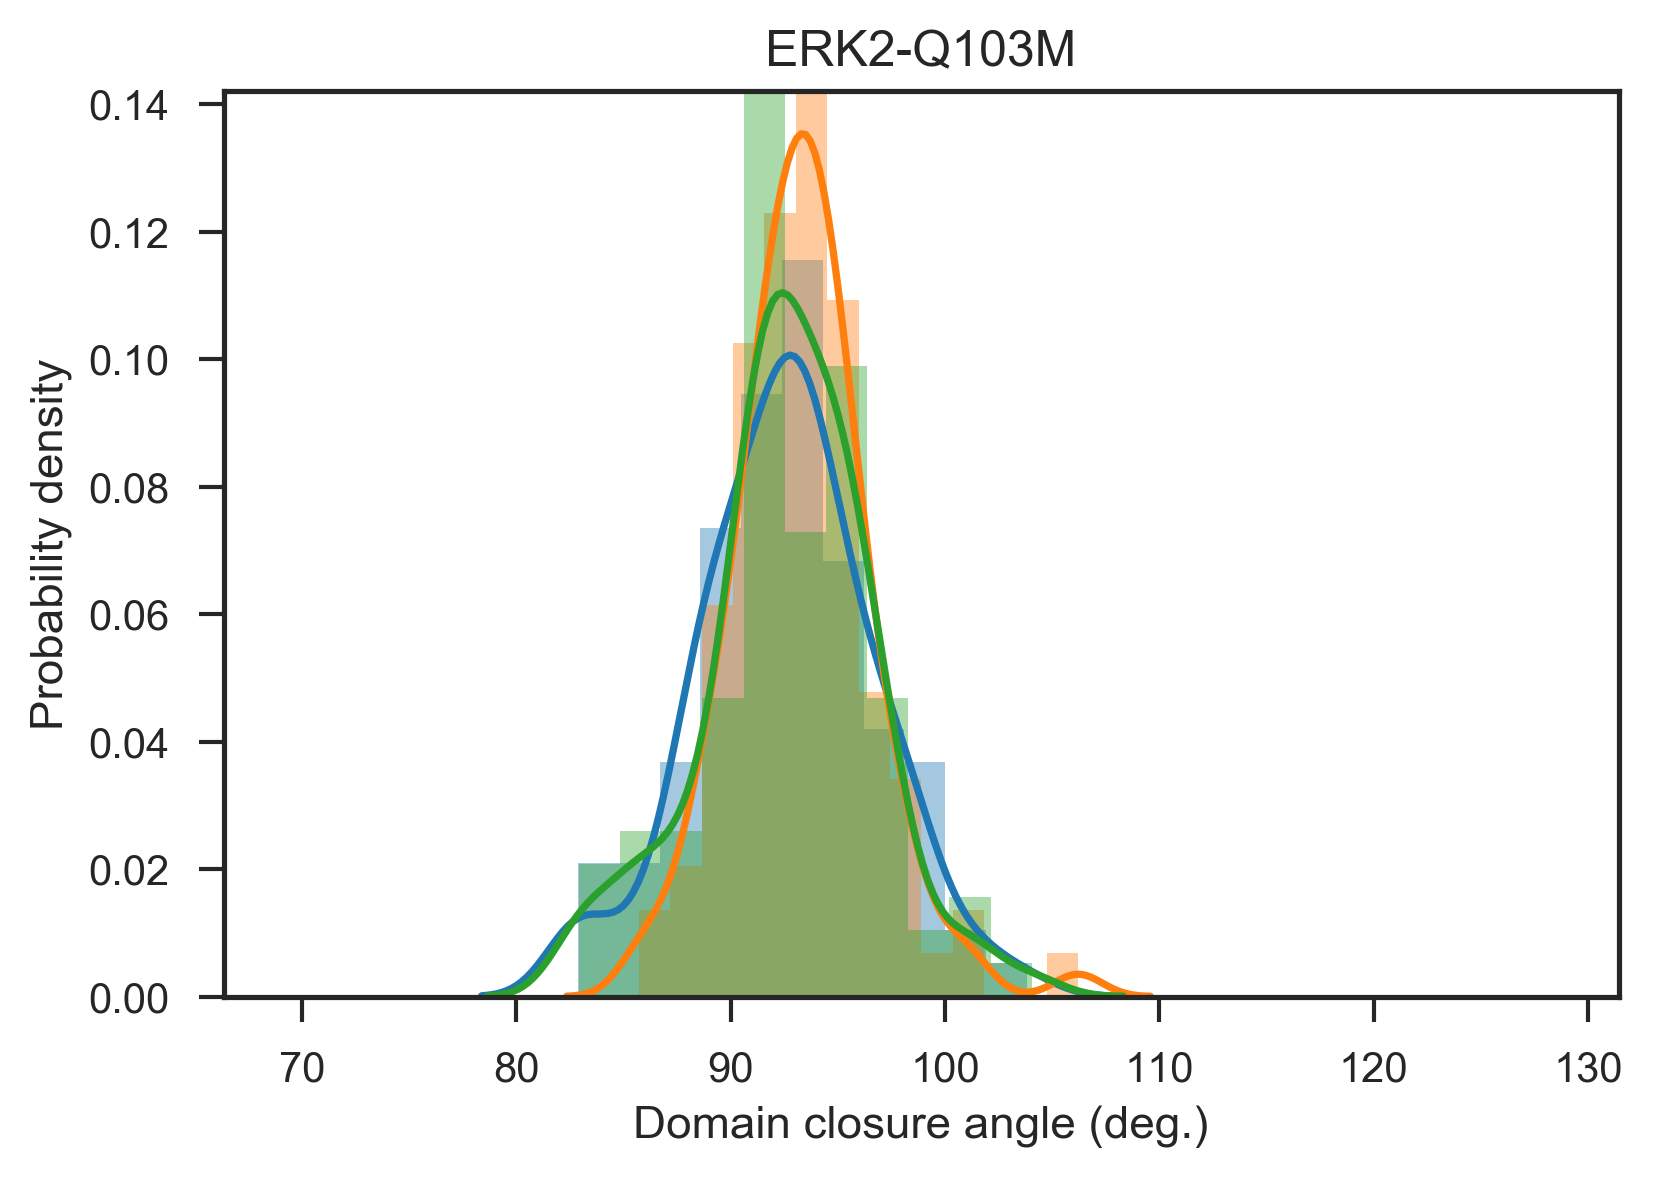

92.57331085801559 93.35719585135003 92.63955474419247
4.086667288825776 3.1746017973504723 3.939041067507352


In [58]:
#meta_angles = np.load('meta_specificangles_wt.npy')
meta_angles = np.load('meta_specificangles_mut.npy')
#meta_angles = np.load('meta_specificangles_ins.npy')
#meta_angles = np.load('meta_specificangles_ins_mut.npy')

plt.figure(dpi=300)

sns.distplot(meta_angles[0])
sns.distplot(meta_angles[1])
sns.distplot(meta_angles[2])
#sns.distplot(meta_angles[3])

plt.xlabel('Domain closure angle (deg.)')
plt.ylabel('Probability density')
plt.title('ERK2-Q103M')
plt.xlim((66.33934120618196, 131.42332912120588)) # same as for the main all-4-systems-distributions figure
plt.show()
print(np.mean(meta_angles[0]), np.mean(meta_angles[1]), np.mean(meta_angles[2]))
print(np.std(meta_angles[0]), np.std(meta_angles[1]), np.std(meta_angles[2]))

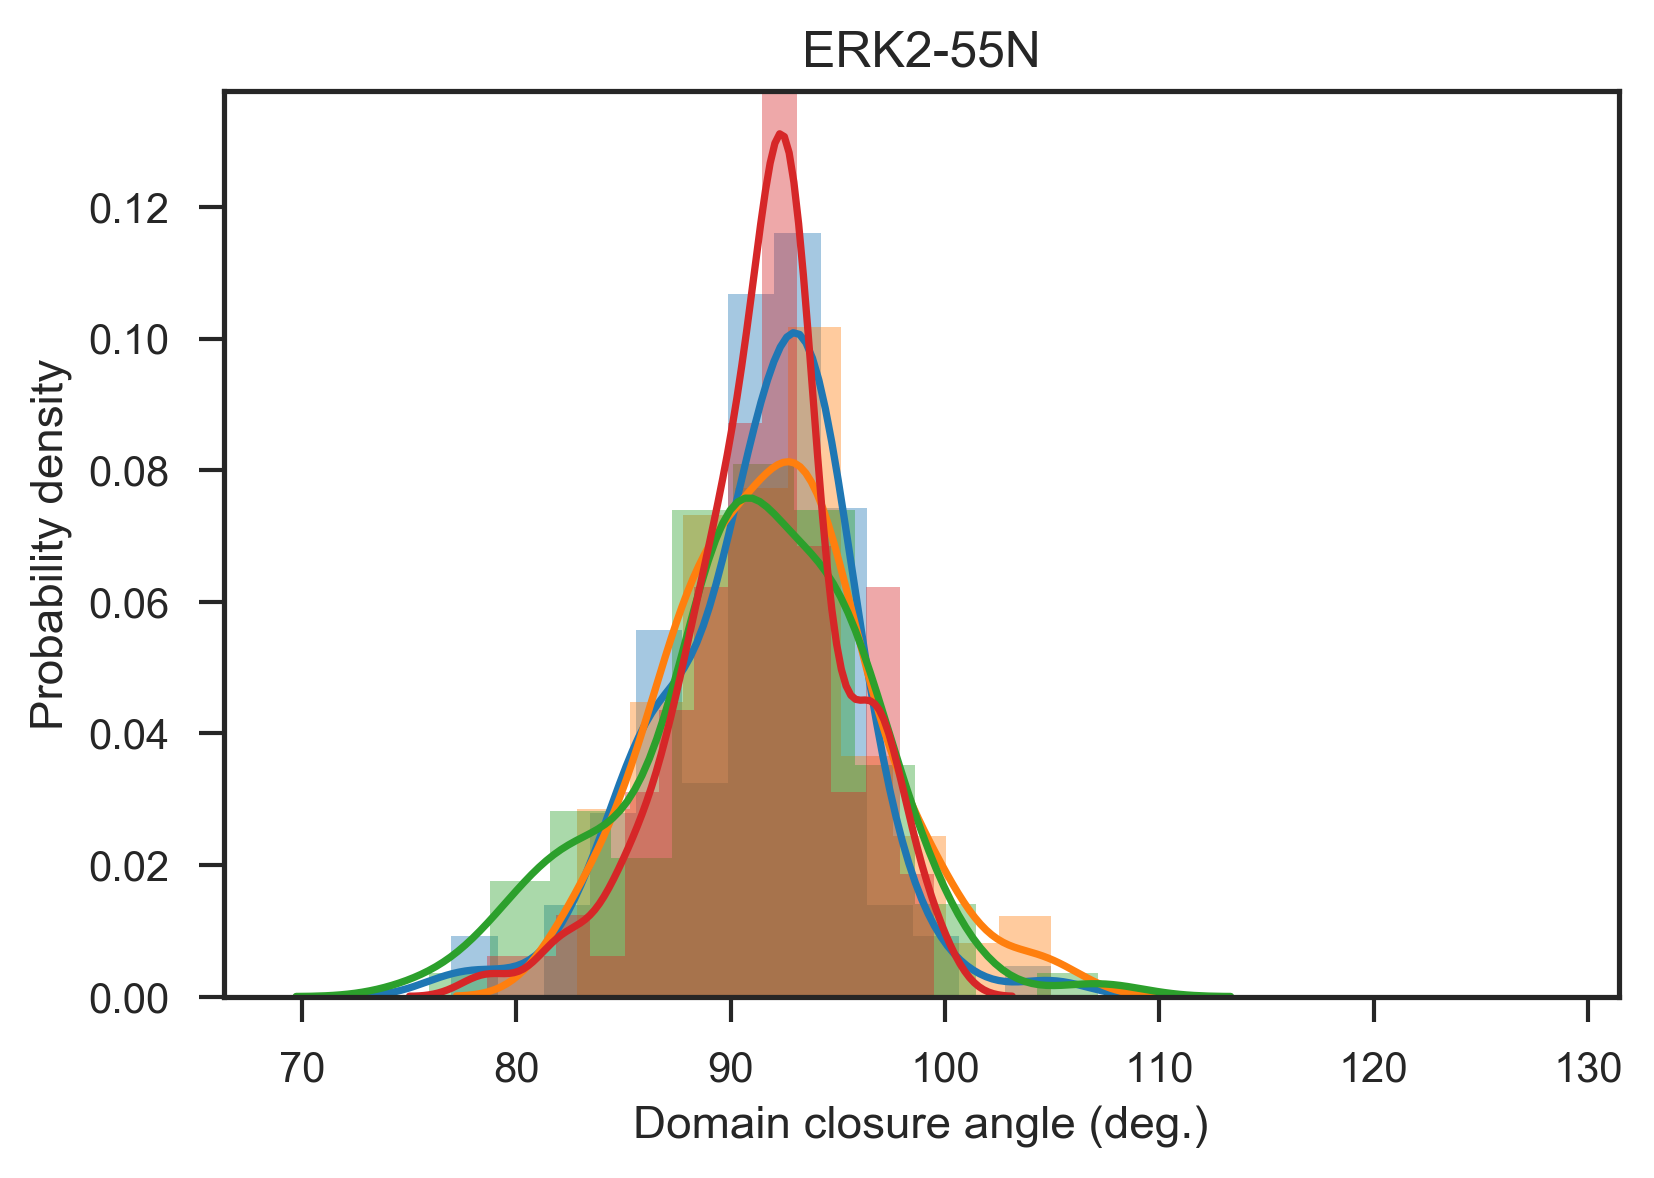

91.31532923993348 91.96753089457714 90.82330816803716 91.53467800722922
4.40327126416713 4.638838966614555 5.414327623095883 3.8335543050469565


In [59]:
#meta_angles = np.load('meta_specificangles_wt.npy')
#meta_angles = np.load('meta_specificangles_mut.npy')
meta_angles = np.load('meta_specificangles_ins.npy')
#meta_angles = np.load('meta_specificangles_ins_mut.npy')

plt.figure(dpi=300)

sns.distplot(meta_angles[0])
sns.distplot(meta_angles[1])
sns.distplot(meta_angles[2])
sns.distplot(meta_angles[3])

plt.xlabel('Domain closure angle (deg.)')
plt.ylabel('Probability density')
plt.title('ERK2-55N')
plt.xlim((66.33934120618196, 131.42332912120588)) # same as for the main all-4-systems-distributions figure
plt.show()
print(np.mean(meta_angles[0]), np.mean(meta_angles[1]), np.mean(meta_angles[2]), np.mean(meta_angles[3]))
print(np.std(meta_angles[0]), np.std(meta_angles[1]), np.std(meta_angles[2]), np.std(meta_angles[3]))

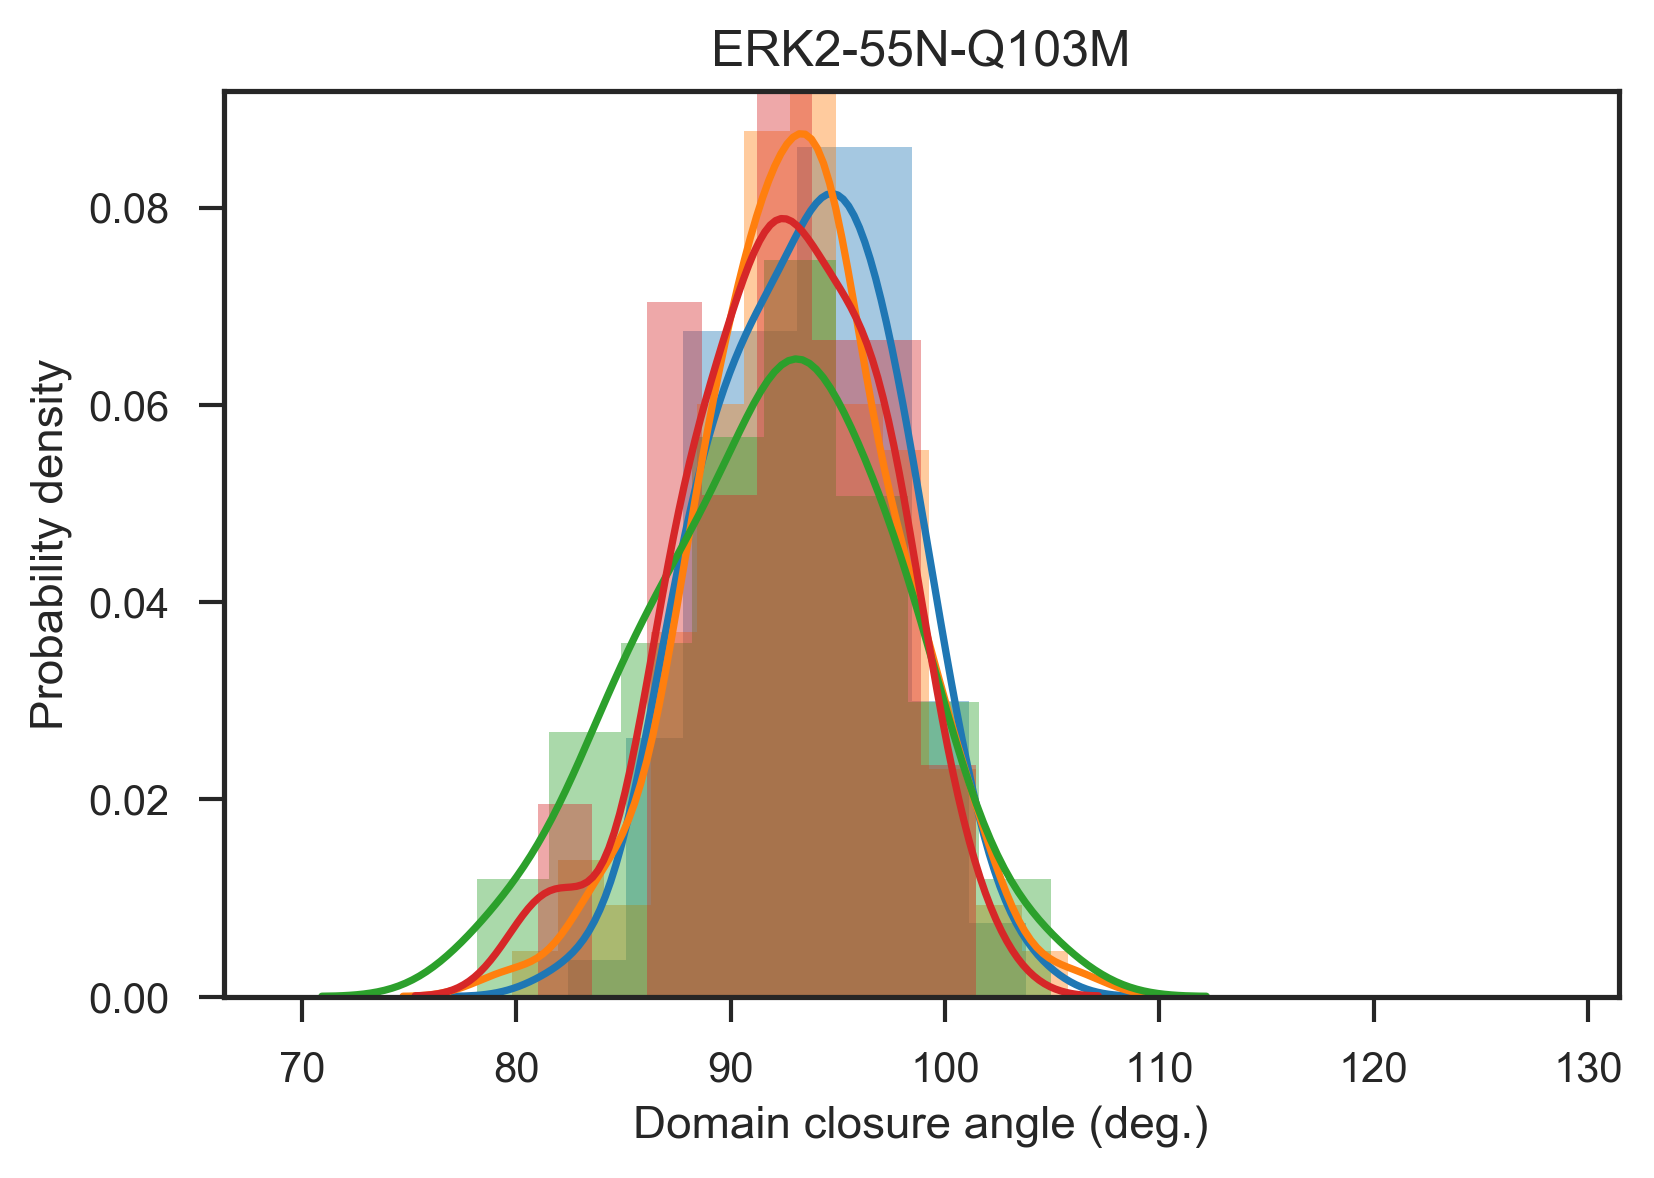

93.50861161142063 93.11258967538924 91.90801340483918 92.40846091696169
4.205337008557503 4.510440344844501 5.69364971812417 4.493323262325869


In [60]:
#meta_angles = np.load('meta_specificangles_wt.npy')
#meta_angles = np.load('meta_specificangles_mut.npy')
#meta_angles = np.load('meta_specificangles_ins.npy')
meta_angles = np.load('meta_specificangles_ins_mut.npy')

plt.figure(dpi=300)

sns.distplot(meta_angles[0])
sns.distplot(meta_angles[1])
sns.distplot(meta_angles[2])
sns.distplot(meta_angles[3])

plt.xlabel('Domain closure angle (deg.)')
plt.ylabel('Probability density')
plt.title('ERK2-55N-Q103M')
plt.xlim((66.33934120618196, 131.42332912120588)) # same as for the main all-4-systems-distributions figure
plt.show()
print(np.mean(meta_angles[0]), np.mean(meta_angles[1]), np.mean(meta_angles[2]), np.mean(meta_angles[3]))
print(np.std(meta_angles[0]), np.std(meta_angles[1]), np.std(meta_angles[2]), np.std(meta_angles[3]))

In [61]:
# ideas for next: check difference in average-of-dataset, and weighted-average-of-macrostate-samples 
# populations of distances and angle